In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_excel("covid_data.xlsx")

In [3]:
df.head()

,Entry_ID,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Num Cases,Current Status,Contracted from which Patient (Suspected),Notes,Source_1,Source_2,Source_3,Nationality,Type of transmission,Status Change Date,Patient Number
0,71973,NaN,2020-06-20,NaN,NaN,NaN,Mamit,Mizoram,MZ,4,Hospitalized,NaN,NaN,https://twitter.com/dipr_mizoram/status/127415...,NaN,NaN,NaN,NaN,NaN,NaN
1,71974,NaN,2020-06-20,NaN,NaN,NaN,Champhai,Mizoram,MZ,3,Hospitalized,NaN,NaN,https://twitter.com/dipr_mizoram/status/127415...,NaN,NaN,NaN,NaN,NaN,NaN
2,71975,NaN,2020-06-20,NaN,NaN,NaN,Serchhip,Mizoram,MZ,2,Hospitalized,NaN,NaN,https://twitter.com/dipr_mizoram/status/127415...,NaN,NaN,NaN,NaN,NaN,NaN
3,71976,NaN,2020-06-20,NaN,NaN,NaN,Khawzawl,Mizoram,MZ,1,Hospitalized,NaN,NaN,https://twitter.com/dipr_mizoram/status/127415...,NaN,NaN,NaN,NaN,NaN,NaN
4,71977,NaN,2020-06-20,NaN,NaN,NaN,Unassigned,State Unassigned,UN,338,Hospitalized,NaN,NaN,mohfw.gov.in,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(22770, 20)

### Cleaning the data

In [5]:
df.isnull().sum()

Entry_ID                                         0
State Patient Number                         12977
Date Announced                                   0
Age Bracket                                  13136
Gender                                       13093
Detected City                                20443
Detected District                              274
Detected State                                   0
State code                                       0
Num Cases                                        0
Current Status                                   0
Contracted from which Patient (Suspected)    22770
Notes                                        16243
Source_1                                      1434
Source_2                                     22762
Source_3                                     22770
Nationality                                  22770
Type of transmission                         22770
Status Change Date                           22770
Patient Number                 

In [6]:
#checking the percentage of missing values in each column
round((df.isnull().sum()/len(df))*100,2)


Entry_ID                                       0.00
State Patient Number                          56.99
Date Announced                                 0.00
Age Bracket                                   57.69
Gender                                        57.50
Detected City                                 89.78
Detected District                              1.20
Detected State                                 0.00
State code                                     0.00
Num Cases                                      0.00
Current Status                                 0.00
Contracted from which Patient (Suspected)    100.00
Notes                                         71.34
Source_1                                       6.30
Source_2                                      99.96
Source_3                                     100.00
Nationality                                  100.00
Type of transmission                         100.00
Status Change Date                           100.00
Patient Numb

In [7]:
#we can see that few of the columns have 0 to no information we will drop those
df.drop(["Contracted from which Patient (Suspected)","Source_2", "Source_3", "Nationality", "Type of transmission", "Status Change Date", "Patient Number"], inplace= True, axis= 1)

In [8]:
print(df.shape)
df.head()

(22770, 13)


,Entry_ID,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Num Cases,Current Status,Notes,Source_1
0,71973,NaN,2020-06-20,NaN,NaN,NaN,Mamit,Mizoram,MZ,4,Hospitalized,NaN,https://twitter.com/dipr_mizoram/status/127415...
1,71974,NaN,2020-06-20,NaN,NaN,NaN,Champhai,Mizoram,MZ,3,Hospitalized,NaN,https://twitter.com/dipr_mizoram/status/127415...
2,71975,NaN,2020-06-20,NaN,NaN,NaN,Serchhip,Mizoram,MZ,2,Hospitalized,NaN,https://twitter.com/dipr_mizoram/status/127415...
3,71976,NaN,2020-06-20,NaN,NaN,NaN,Khawzawl,Mizoram,MZ,1,Hospitalized,NaN,https://twitter.com/dipr_mizoram/status/127415...
4,71977,NaN,2020-06-20,NaN,NaN,NaN,Unassigned,State Unassigned,UN,338,Hospitalized,NaN,mohfw.gov.in


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Entry_ID              22770 non-null  int64         
 1   State Patient Number  9793 non-null   object        
 2   Date Announced        22770 non-null  datetime64[ns]
 3   Age Bracket           9634 non-null   object        
 4   Gender                9677 non-null   object        
 5   Detected City         2327 non-null   object        
 6   Detected District     22496 non-null  object        
 7   Detected State        22770 non-null  object        
 8   State code            22770 non-null  object        
 9   Num Cases             22770 non-null  int64         
 10  Current Status        22770 non-null  object        
 11  Notes                 6527 non-null   object        
 12  Source_1              21336 non-null  object        
dtypes: datetime64[ns

In [10]:
df["Detected State"].unique()

array(['Mizoram', 'State Unassigned', 'Nagaland', 'Odisha', 'Rajasthan',
       'Himachal Pradesh', 'Bihar', 'Puducherry', 'Uttarakhand',
       'Haryana', 'Kerala', 'Tamil Nadu', 'Andhra Pradesh', 'Ladakh',
       'Madhya Pradesh', 'Karnataka',
       'Dadra and Nagar Haveli and Daman and Diu', 'Assam', 'Chandigarh',
       'Goa', 'Punjab', 'Jammu and Kashmir', 'Gujarat', 'West Bengal',
       'Chhattisgarh', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Maharashtra', 'Jharkhand', 'Delhi', 'Arunachal Pradesh',
       'Manipur', 'Meghalaya', 'Andaman and Nicobar Islands', 'Sikkim'],
      dtype=object)

In [11]:
df["Detected State"].value_counts()

Karnataka                                   9797
Bihar                                       2721
Uttar Pradesh                               1457
Maharashtra                                  850
Tamil Nadu                                   839
Kerala                                       758
Rajasthan                                    689
Gujarat                                      576
Madhya Pradesh                               560
West Bengal                                  461
Haryana                                      442
Odisha                                       426
Andhra Pradesh                               401
Jammu and Kashmir                            356
Uttarakhand                                  340
Punjab                                       316
Chhattisgarh                                 290
Jharkhand                                    214
Telangana                                    191
Himachal Pradesh                             156
Manipur             

In [12]:
df["Detected District"].value_counts()

Bengaluru Urban       3762
Ballari                811
Kalaburagi             766
Dakshina Kannada       521
Bidar                  427
                      ... 
Peddapalli               1
Tawang                   1
West Jaintia Hills       1
Ribhoi                   1
West Garo Hills          1
Name: Detected District, Length: 686, dtype: int64

<AxesSubplot:>

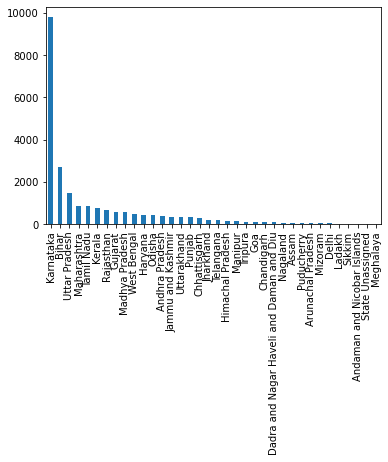

In [13]:
df["Detected State"].value_counts().plot.bar()

In [14]:
df["Detected State"].replace(to_replace= "Dadra and Nagar Haveli and Daman and Diu" , value= "Daman N Diu", inplace= True)

In [15]:
df["Detected State"].value_counts()

Karnataka                      9797
Bihar                          2721
Uttar Pradesh                  1457
Maharashtra                     850
Tamil Nadu                      839
Kerala                          758
Rajasthan                       689
Gujarat                         576
Madhya Pradesh                  560
West Bengal                     461
Haryana                         442
Odisha                          426
Andhra Pradesh                  401
Jammu and Kashmir               356
Uttarakhand                     340
Punjab                          316
Chhattisgarh                    290
Jharkhand                       214
Telangana                       191
Himachal Pradesh                156
Manipur                         131
Tripura                         109
Goa                             107
Chandigarh                       94
Daman N Diu                      81
Nagaland                         76
Assam                            60
Puducherry                  

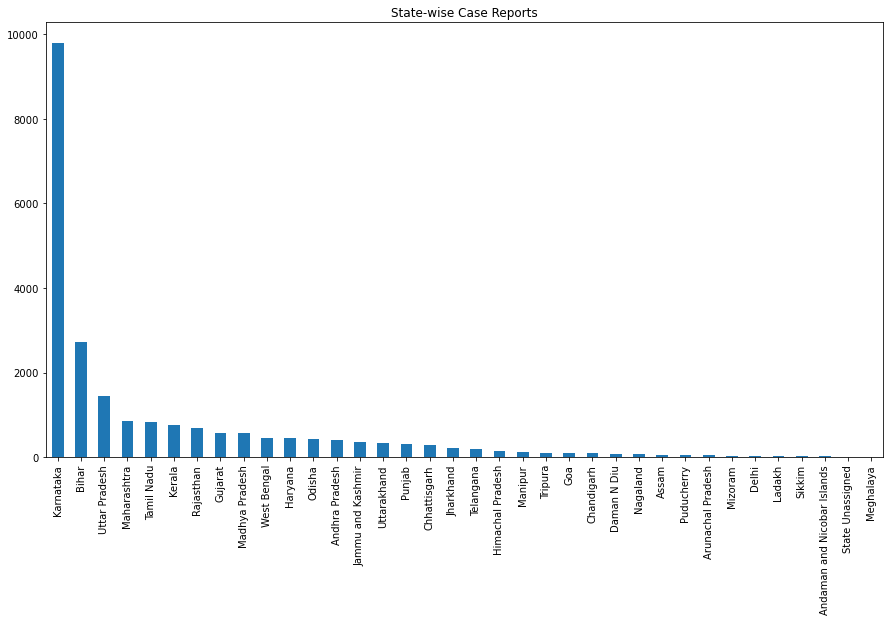

In [261]:
plt.rcParams["figure.figsize"]= (15,8)
df["Detected State"].value_counts().plot.bar()
plt.title("State-wise Case Reports")
plt.show()


In [18]:
df["Detected State"].value_counts()

Karnataka                      9797
Bihar                          2721
Uttar Pradesh                  1457
Maharashtra                     850
Tamil Nadu                      839
Kerala                          758
Rajasthan                       689
Gujarat                         576
Madhya Pradesh                  560
West Bengal                     461
Haryana                         442
Odisha                          426
Andhra Pradesh                  401
Jammu and Kashmir               356
Uttarakhand                     340
Punjab                          316
Chhattisgarh                    290
Jharkhand                       214
Telangana                       191
Himachal Pradesh                156
Manipur                         131
Tripura                         109
Goa                             107
Chandigarh                       94
Daman N Diu                      81
Nagaland                         76
Assam                            60
Puducherry                  

for_pie= df["Detected State"]

In [19]:
df["Notes"].value_counts()

Contact under tracing                                                      1079
ILI                                                                         690
Designated hospital, Bengaluru Urban                                        640
Designated Hospital, Bengaluru                                              485
Returnee from Maharashtra                                                   433
                                                                           ... 
ILI ;Fever & Breathlessness ; IHD ; DOA - 21.06.2020 ; DOD - 21.06.2020       1
ILI ;Fever & Breathlessness ; - ; DOA - 21.06.2020 ; DOD - 21.06.2020         1
Contact of P 9404                                                             1
Inter district travel - Dharwada                                              1
Re Con                                                                        1
Name: Notes, Length: 989, dtype: int64

In [20]:
df["Age Bracket"].value_counts()

30         340
35         319
25         317
40         315
45         285
          ... 
2.5          1
97           1
1 DAY        1
9 Month      1
0.3          1
Name: Age Bracket, Length: 108, dtype: int64

In [21]:
pd.set_option("display.max_columns", 800)
pd.set_option("display.max_rows", 800)

In [22]:
df["Age Bracket"].value_counts()

30          340
35          319
25          317
40          315
45          285
32          283
26          279
28          267
50          244
27          239
24          237
55          226
38          214
23          201
36          197
29          188
34          185
48          183
60          179
31          178
20          176
65          170
42          169
22          163
21          156
37          150
33          149
39          148
52          132
58          124
18          122
46          118
56          117
43          116
54          115
53          115
44          113
49          106
51          103
19          102
47          100
41           97
57           86
59           80
17           77
14           75
70           75
15           73
12           67
7            67
62           63
63           62
13           61
16           61
68           57
8            55
6            53
9            53
66           53
10           53
64           51
11           51
61      

In [23]:
df[df["Age Bracket"]== "18-28"].index

Int64Index([22757, 22758], dtype='int64')

In [24]:
df.drop(df[df["Age Bracket"]== "18-28"].index, inplace= True)

In [25]:
df["Age Bracket"].value_counts()

30          340
35          319
25          317
40          315
45          285
32          283
26          279
28          267
50          244
27          239
24          237
55          226
38          214
23          201
36          197
29          188
34          185
48          183
60          179
31          178
20          176
65          170
42          169
22          163
21          156
37          150
33          149
39          148
52          132
58          124
18          122
46          118
56          117
43          116
53          115
54          115
44          113
49          106
51          103
19          102
47          100
41           97
57           86
59           80
17           77
70           75
14           75
15           73
12           67
7            67
62           63
63           62
13           61
16           61
68           57
8            55
6            53
66           53
10           53
9            53
11           51
64           51
61      

In [26]:
df[df["Age Bracket"]== "1 DAY"].index

Int64Index([21276], dtype='int64')

In [27]:
df.drop(df[df["Age Bracket"]== "1 DAY"].index, inplace= True)

In [28]:
df["Age Bracket"].value_counts()

30          340
35          319
25          317
40          315
45          285
32          283
26          279
28          267
50          244
27          239
24          237
55          226
38          214
23          201
36          197
29          188
34          185
48          183
60          179
31          178
20          176
65          170
42          169
22          163
21          156
37          150
33          149
39          148
52          132
58          124
18          122
46          118
56          117
43          116
53          115
54          115
44          113
49          106
51          103
19          102
47          100
41           97
57           86
59           80
17           77
70           75
14           75
15           73
12           67
7            67
62           63
63           62
13           61
16           61
68           57
8            55
6            53
66           53
10           53
9            53
11           51
64           51
61      

In [29]:
df.drop(df[df["Age Bracket"]== "9 Month"].index, inplace= True)

In [30]:
df["Age Bracket"].value_counts()

30          340
35          319
25          317
40          315
45          285
32          283
26          279
28          267
50          244
27          239
24          237
55          226
38          214
23          201
36          197
29          188
34          185
48          183
60          179
31          178
20          176
65          170
42          169
22          163
21          156
37          150
33          149
39          148
52          132
58          124
18          122
46          118
56          117
43          116
53          115
54          115
44          113
49          106
51          103
19          102
47          100
41           97
57           86
59           80
17           77
70           75
14           75
15           73
7            67
12           67
62           63
63           62
16           61
13           61
68           57
8            55
10           53
6            53
9            53
66           53
11           51
64           51
61      

In [31]:
df.drop(df[df["Age Bracket"]== "8 month"].index, inplace= True)

In [32]:
df.drop(df[df["Age Bracket"]== "9 Months"].index, inplace= True)

In [33]:
df.drop(df[df["Age Bracket"]== "5 Months"].index, inplace= True)

In [34]:
df.drop(df[df["Age Bracket"]== "5 months"].index, inplace= True)

In [35]:
df["Age Bracket"].value_counts()

30.00    340
35.00    319
25.00    317
40.00    315
45.00    285
32.00    283
26.00    279
28.00    267
50.00    244
27.00    239
24.00    237
55.00    226
38.00    214
23.00    201
36.00    197
29.00    188
34.00    185
48.00    183
60.00    179
31.00    178
20.00    176
65.00    170
42.00    169
22.00    163
21.00    156
37.00    150
33.00    149
39.00    148
52.00    132
58.00    124
18.00    122
46.00    118
56.00    117
43.00    116
54.00    115
53.00    115
44.00    113
49.00    106
51.00    103
19.00    102
47.00    100
41.00     97
57.00     86
59.00     80
17.00     77
70.00     75
14.00     75
15.00     73
12.00     67
7.00      67
62.00     63
63.00     62
13.00     61
16.00     61
68.00     57
8.00      55
6.00      53
9.00      53
10.00     53
66.00     53
64.00     51
11.00     51
61.00     50
4.00      48
75.00     44
67.00     42
72.00     42
2.00      39
5.00      38
1.00      36
3.00      35
69.00     31
71.00     28
80.00     23
74.00     19
85.00     19
73.00     19

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22762 entries, 0 to 22769
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Entry_ID              22762 non-null  int64         
 1   State Patient Number  9787 non-null   object        
 2   Date Announced        22762 non-null  datetime64[ns]
 3   Age Bracket           9626 non-null   object        
 4   Gender                9669 non-null   object        
 5   Detected City         2327 non-null   object        
 6   Detected District     22488 non-null  object        
 7   Detected State        22762 non-null  object        
 8   State code            22762 non-null  object        
 9   Num Cases             22762 non-null  int64         
 10  Current Status        22762 non-null  object        
 11  Notes                 6520 non-null   object        
 12  Source_1              21328 non-null  object        
dtypes: datetime64[ns

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Age Distrbution of patients')

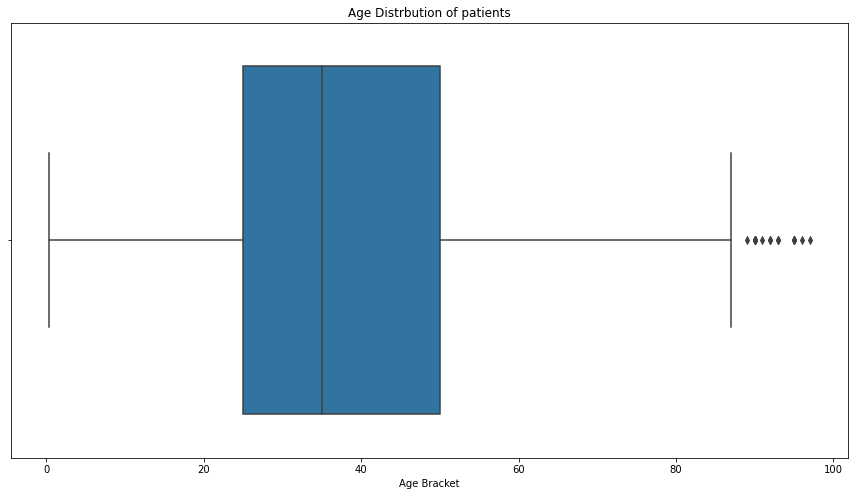

In [262]:
sns.boxplot(df["Age Bracket"])
plt.title("Age Distrbution of patients")

In [38]:
df["Age Bracket"].isnull().sum()

13136

In [39]:
df.head()

,Entry_ID,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Num Cases,Current Status,Notes,Source_1
0,71973,NaN,2020-06-20,NaN,NaN,NaN,Mamit,Mizoram,MZ,4,Hospitalized,NaN,https://twitter.com/dipr_mizoram/status/127415...
1,71974,NaN,2020-06-20,NaN,NaN,NaN,Champhai,Mizoram,MZ,3,Hospitalized,NaN,https://twitter.com/dipr_mizoram/status/127415...
2,71975,NaN,2020-06-20,NaN,NaN,NaN,Serchhip,Mizoram,MZ,2,Hospitalized,NaN,https://twitter.com/dipr_mizoram/status/127415...
3,71976,NaN,2020-06-20,NaN,NaN,NaN,Khawzawl,Mizoram,MZ,1,Hospitalized,NaN,https://twitter.com/dipr_mizoram/status/127415...
4,71977,NaN,2020-06-20,NaN,NaN,NaN,Unassigned,State Unassigned,UN,338,Hospitalized,NaN,mohfw.gov.in


Text(0.5, 1.0, 'Gender Distribution of Patients')

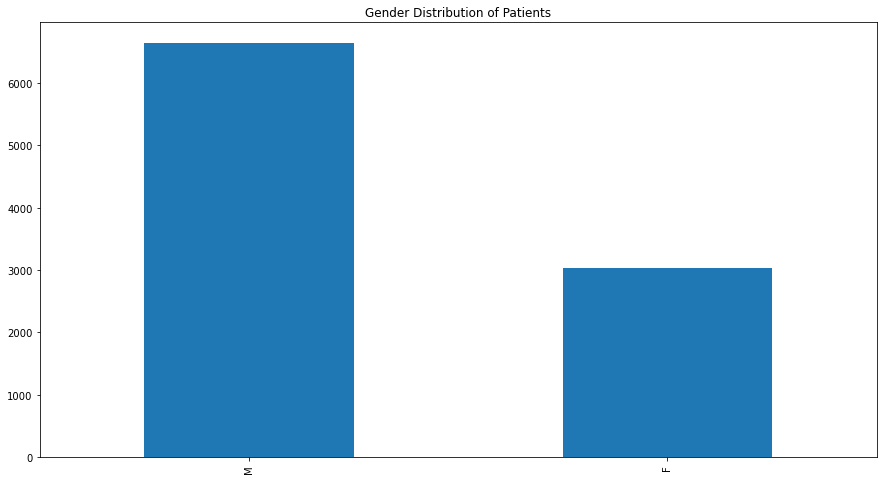

In [263]:
df["Gender"].value_counts().plot.bar()
plt.title("Gender Distribution of Patients")

In [41]:
df["Detected City"].value_counts()

Patna                        75
Naugachhiya                  39
Nawada                       35
Biharsharif                  32
Patna City                   31
Jagdishpur                   29
Kahra                        29
Basantpur                    25
Ara                          25
Balia                        23
Katihar                      23
Andhratharhi                 22
Aurangabad                   20
Chausa                       20
Mushahari                    20
Warisnagar                   19
Dalsingsarai                 18
Narayanpur                   18
Goreakothi                   17
Rosera                       17
Hayaghat                     17
Police Line                  17
Shahpur                      16
Paliganj                     16
Pirpainti                    15
Darbhanga                    15
Begusarai                    15
Bhabhua                      14
Motipur                      14
Masaurhi                     14
Bettiah                      14
Samastip

In [42]:
df.head()

,Entry_ID,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Num Cases,Current Status,Notes,Source_1
0,71973,NaN,2020-06-20,NaN,NaN,NaN,Mamit,Mizoram,MZ,4,Hospitalized,NaN,https://twitter.com/dipr_mizoram/status/127415...
1,71974,NaN,2020-06-20,NaN,NaN,NaN,Champhai,Mizoram,MZ,3,Hospitalized,NaN,https://twitter.com/dipr_mizoram/status/127415...
2,71975,NaN,2020-06-20,NaN,NaN,NaN,Serchhip,Mizoram,MZ,2,Hospitalized,NaN,https://twitter.com/dipr_mizoram/status/127415...
3,71976,NaN,2020-06-20,NaN,NaN,NaN,Khawzawl,Mizoram,MZ,1,Hospitalized,NaN,https://twitter.com/dipr_mizoram/status/127415...
4,71977,NaN,2020-06-20,NaN,NaN,NaN,Unassigned,State Unassigned,UN,338,Hospitalized,NaN,mohfw.gov.in


In [43]:
df["Current Status"].value_counts()

Hospitalized      14925
Recovered          6833
Deceased            994
Migrated_Other        9
Migrated_other        1
Name: Current Status, dtype: int64

In [44]:
df["Current Status"].replace(to_replace= "Migrated_other" , value= "Migrated_Other", inplace= True)

In [45]:
df["Current Status"].value_counts()

Hospitalized      14925
Recovered          6833
Deceased            994
Migrated_Other       10
Name: Current Status, dtype: int64

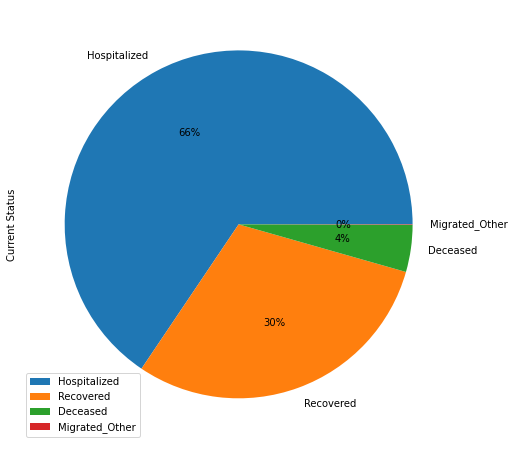

In [46]:
df["Current Status"].value_counts().plot.pie(autopct= "%1.f%%")
plt.legend()

In [47]:
df.head()

,Entry_ID,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Num Cases,Current Status,Notes,Source_1
0,71973,NaN,2020-06-20,NaN,NaN,NaN,Mamit,Mizoram,MZ,4,Hospitalized,NaN,https://twitter.com/dipr_mizoram/status/127415...
1,71974,NaN,2020-06-20,NaN,NaN,NaN,Champhai,Mizoram,MZ,3,Hospitalized,NaN,https://twitter.com/dipr_mizoram/status/127415...
2,71975,NaN,2020-06-20,NaN,NaN,NaN,Serchhip,Mizoram,MZ,2,Hospitalized,NaN,https://twitter.com/dipr_mizoram/status/127415...
3,71976,NaN,2020-06-20,NaN,NaN,NaN,Khawzawl,Mizoram,MZ,1,Hospitalized,NaN,https://twitter.com/dipr_mizoram/status/127415...
4,71977,NaN,2020-06-20,NaN,NaN,NaN,Unassigned,State Unassigned,UN,338,Hospitalized,NaN,mohfw.gov.in


In [48]:
df.head()

,Entry_ID,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Num Cases,Current Status,Notes,Source_1
0,71973,NaN,2020-06-20,NaN,NaN,NaN,Mamit,Mizoram,MZ,4,Hospitalized,NaN,https://twitter.com/dipr_mizoram/status/127415...
1,71974,NaN,2020-06-20,NaN,NaN,NaN,Champhai,Mizoram,MZ,3,Hospitalized,NaN,https://twitter.com/dipr_mizoram/status/127415...
2,71975,NaN,2020-06-20,NaN,NaN,NaN,Serchhip,Mizoram,MZ,2,Hospitalized,NaN,https://twitter.com/dipr_mizoram/status/127415...
3,71976,NaN,2020-06-20,NaN,NaN,NaN,Khawzawl,Mizoram,MZ,1,Hospitalized,NaN,https://twitter.com/dipr_mizoram/status/127415...
4,71977,NaN,2020-06-20,NaN,NaN,NaN,Unassigned,State Unassigned,UN,338,Hospitalized,NaN,mohfw.gov.in


In [49]:
df["Num Cases"].sum()

328030

# Karnataka breakdown 

In [50]:
kar_Df= df[df["Detected State"]== "Karnataka"]

In [51]:
len(kar_Df)

9791

In [52]:
kar_Df.head()

,Entry_ID,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Num Cases,Current Status,Notes,Source_1
395,72448,KA-P8282,2020-06-20,36,F,NaN,Uttara Kannada,Karnataka,KA,1,Hospitalized,International travel from Saudi Arabia,https://t.me/Karnataka_KoViD19_Broadcast/4213
396,72449,KA-P8283,2020-06-20,24,M,NaN,Uttara Kannada,Karnataka,KA,1,Hospitalized,Returnee from Maharashtra,https://t.me/Karnataka_KoViD19_Broadcast/4213
397,72450,KA-P8284,2020-06-20,45,M,NaN,Uttara Kannada,Karnataka,KA,1,Hospitalized,Returnee from Maharashtra,https://t.me/Karnataka_KoViD19_Broadcast/4213
398,72451,KA-P8285,2020-06-20,26,F,NaN,Uttara Kannada,Karnataka,KA,1,Hospitalized,Returnee from Maharashtra,https://t.me/Karnataka_KoViD19_Broadcast/4213
399,72452,KA-P8286,2020-06-20,52,M,NaN,Dharwad,Karnataka,KA,1,Hospitalized,ILI,https://t.me/Karnataka_KoViD19_Broadcast/4213


In [53]:
kar_Df["Num Cases"].sum()

9788

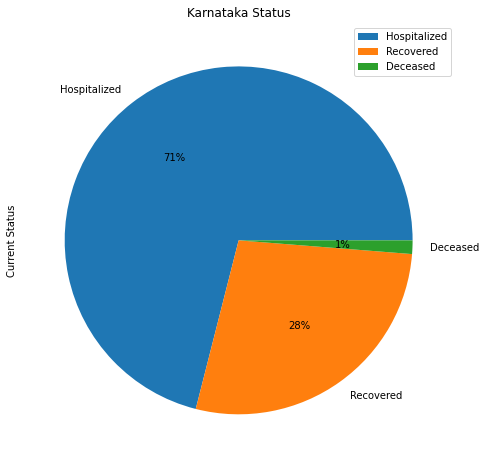

In [54]:
kar_Df["Current Status"].value_counts().plot.pie(autopct= "%1.f%%")
plt.title("Karnataka Status")
plt.legend()

<AxesSubplot:>

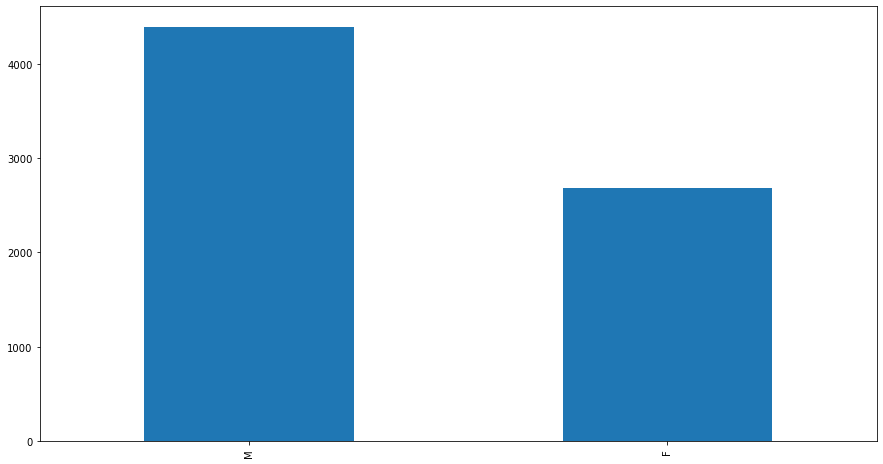

In [55]:
kar_Df["Gender"].value_counts().plot.bar()

Text(0.5, 1.0, 'Karnataka Cases Gender Distribution')

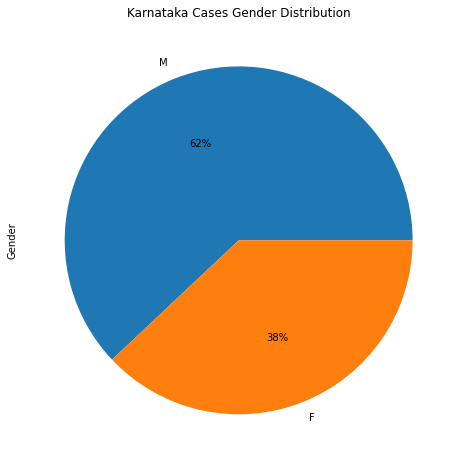

In [56]:
kar_Df["Gender"].value_counts().plot.pie(autopct= "%1.f%%")
plt.title("Karnataka Cases Gender Distribution")

Text(0.5, 1.0, 'Karnataka District-wise Breakdown')

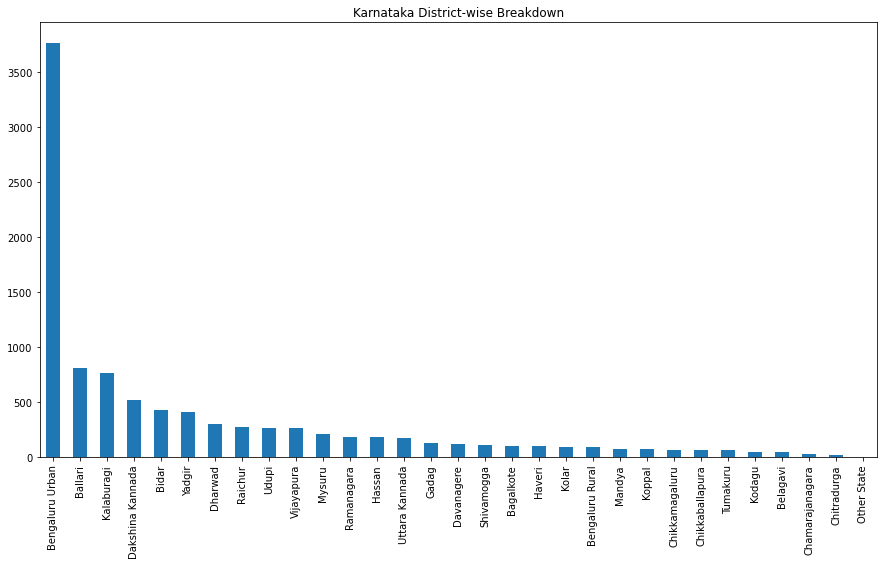

In [57]:
kar_Df["Detected District"].value_counts().plot.bar()
plt.title("Karnataka District-wise Breakdown")

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


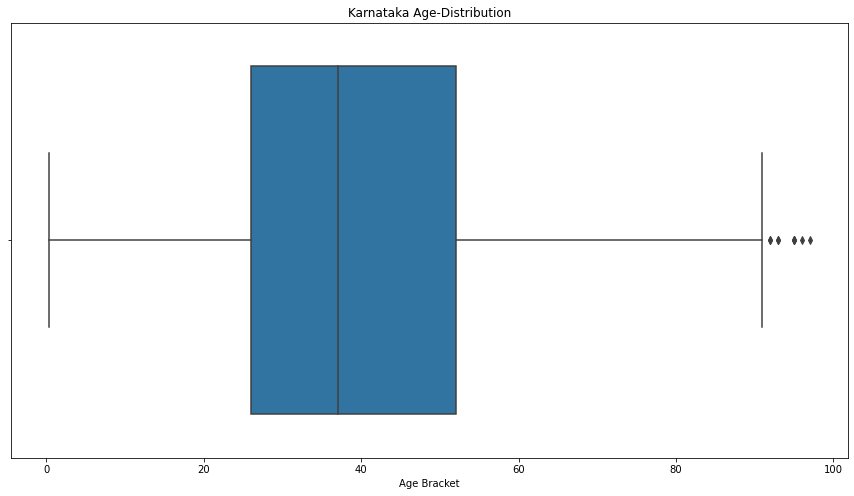

Average age of patients in Karnataka 38.98996467928793


In [58]:
sns.boxplot(kar_Df["Age Bracket"])
plt.title("Karnataka Age-Distribution")
plt.show()
print("Average age of patients in Karnataka", kar_Df['Age Bracket'].mean())



In [59]:
kar_Df["Detected City"].isnull().sum()

9791

# Bihar breakdown

In [60]:
bihar_df= df[df["Detected State"]== "Bihar"]

In [61]:
bihar_df.head()

,Entry_ID,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Num Cases,Current Status,Notes,Source_1
40,72087,NaN,2020-06-20,60,M,Dhuraiya,Banka,Bihar,BR,1,Hospitalized,NaN,https://twitter.com/BiharHealthDept/status/127...
41,72088,NaN,2020-06-20,35,F,Dhuraiya,Banka,Bihar,BR,1,Hospitalized,NaN,https://twitter.com/BiharHealthDept/status/127...
42,72089,NaN,2020-06-20,24,M,Dhuraiya,Banka,Bihar,BR,1,Hospitalized,NaN,https://twitter.com/BiharHealthDept/status/127...
43,72090,NaN,2020-06-20,28,M,Chandan,Banka,Bihar,BR,1,Hospitalized,NaN,https://twitter.com/BiharHealthDept/status/127...
44,72091,NaN,2020-06-20,48,M,Chandan,Banka,Bihar,BR,1,Hospitalized,NaN,https://twitter.com/BiharHealthDept/status/127...


In [62]:
bihar_df.shape

(2721, 13)

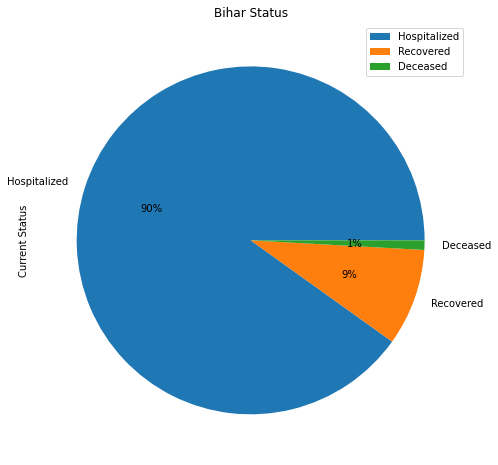

In [63]:
bihar_df["Current Status"].value_counts().plot.pie(autopct= "%1.f%%")
plt.title("Bihar Status")
plt.legend()

In [64]:
print("Total number of cases in Bihar", bihar_df["Num Cases"].sum())

Total number of cases in Bihar 5163


Text(0.5, 1.0, 'Bihar Cases Gender Ditribution')

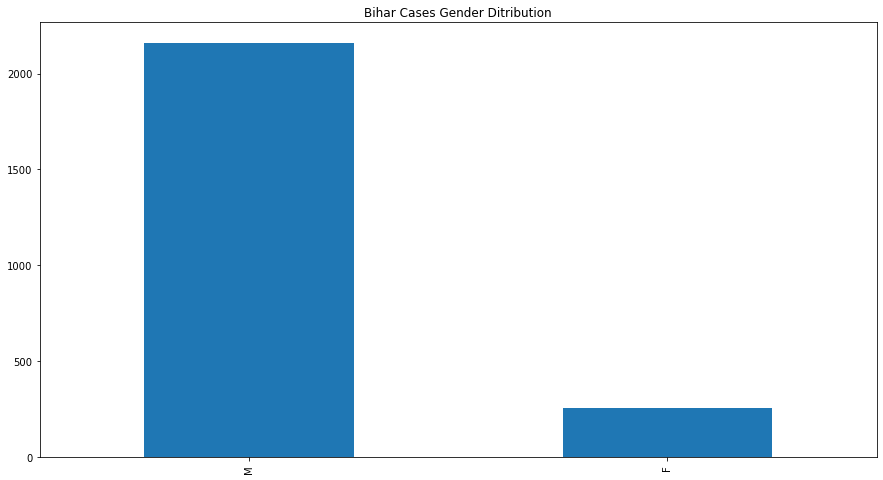

In [65]:
bihar_df["Gender"].value_counts().plot.bar()
plt.title("Bihar Cases Gender Ditribution")

Text(0.5, 1.0, 'Bihar Cases Gender Ditribution')

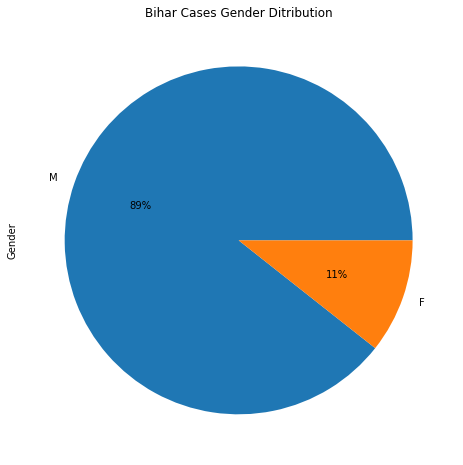

In [66]:
bihar_df["Gender"].value_counts().plot.pie(autopct= "%1.f%%")
plt.title("Bihar Cases Gender Ditribution")

Text(0.5, 1.0, 'Bihar District-wise Breakdown')

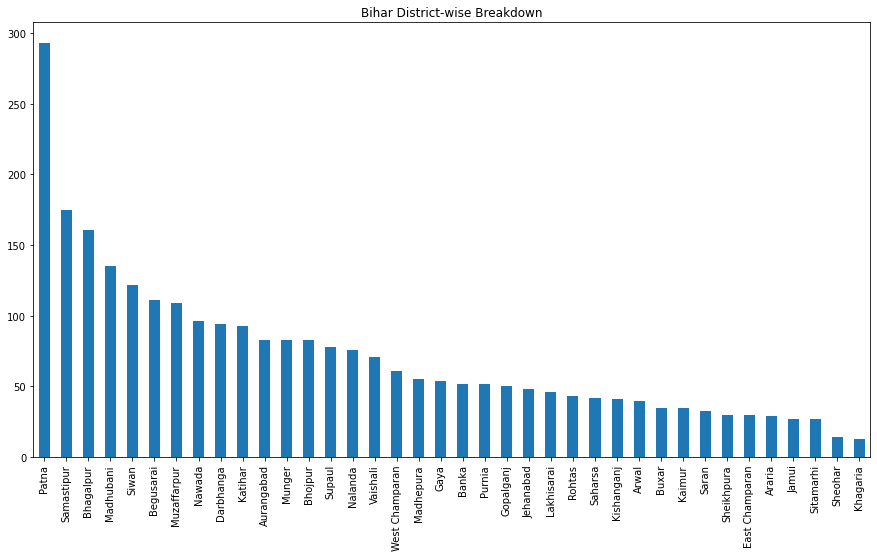

In [67]:
bihar_df["Detected District"].value_counts().plot.bar()
plt.title("Bihar District-wise Breakdown")

In [68]:
bihar_df["Detected City"].value_counts()

Patna                        75
Naugachhiya                  39
Nawada                       35
Biharsharif                  32
Patna City                   31
Kahra                        29
Jagdishpur                   29
Basantpur                    25
Ara                          25
Balia                        23
Katihar                      23
Andhratharhi                 22
Chausa                       20
Aurangabad                   20
Mushahari                    20
Warisnagar                   19
Narayanpur                   18
Dalsingsarai                 18
Rosera                       17
Hayaghat                     17
Police Line                  17
Goreakothi                   17
Shahpur                      16
Paliganj                     16
Darbhanga                    15
Pirpainti                    15
Begusarai                    15
Bettiah                      14
Masaurhi                     14
Bhabhua                      14
Motipur                      14
Raghopur

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


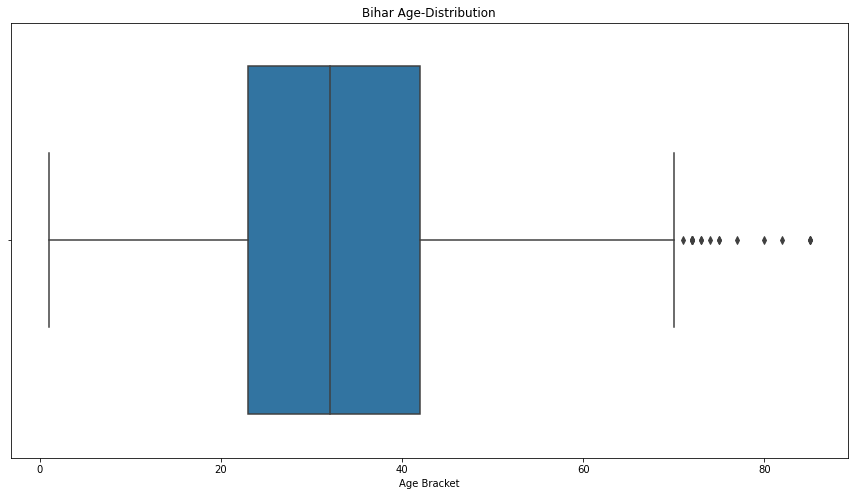

Average age of patients in Bihar 33.37582781456954


In [69]:
sns.boxplot(bihar_df["Age Bracket"])
plt.title("Bihar Age-Distribution")
plt.show()
print("Average age of patients in Bihar", bihar_df['Age Bracket'].mean())


# Uttar Pradesh Breakdown

In [70]:
UP_df= df[df["Detected State"]== "Uttar Pradesh"]

In [71]:
UP_df.shape

(1457, 13)

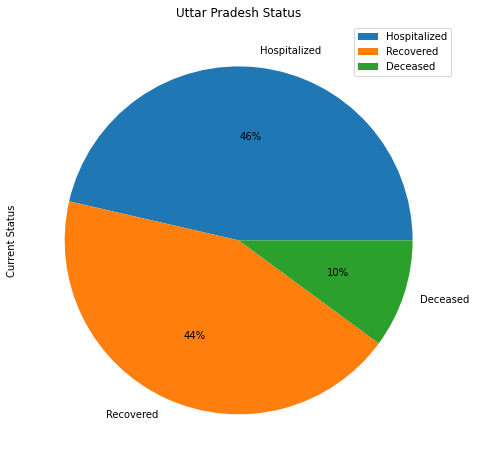

In [72]:
UP_df["Current Status"].value_counts().plot.pie(autopct= "%1.f%%")
plt.title("Uttar Pradesh Status")
plt.legend()

In [73]:
print("Total number of cases in Uttar Pradesh", UP_df["Num Cases"].sum()) #3rd Highest

Total number of cases in Uttar Pradesh 13177


In [74]:
UP_df.Gender.isnull().sum()

1457

Text(0.5, 1.0, 'Uttar Pradesh District-wise Breakdown')

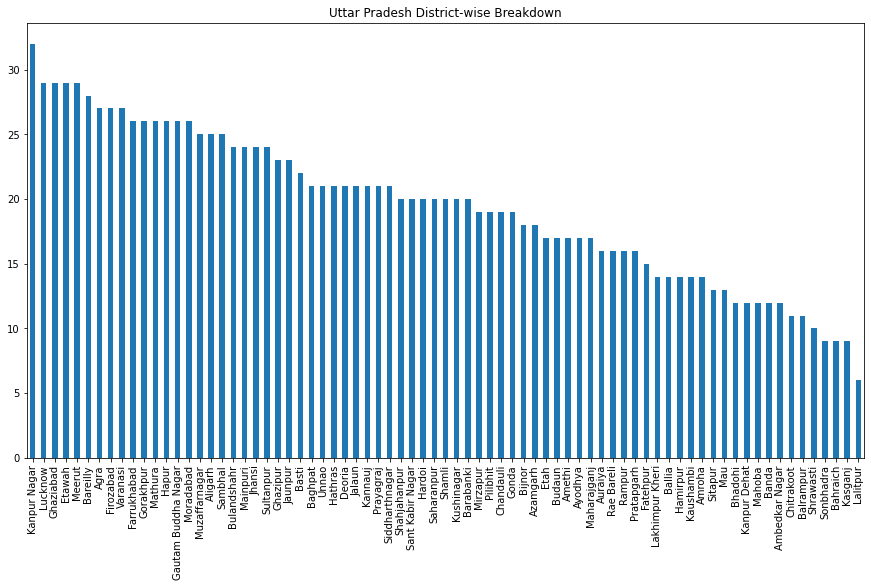

In [75]:
UP_df["Detected District"].value_counts().plot.bar()
plt.title("Uttar Pradesh District-wise Breakdown")

# Maharastra Breakdown

In [76]:
maharashtra_df= df[df["Detected State"]== "Maharashtra"]

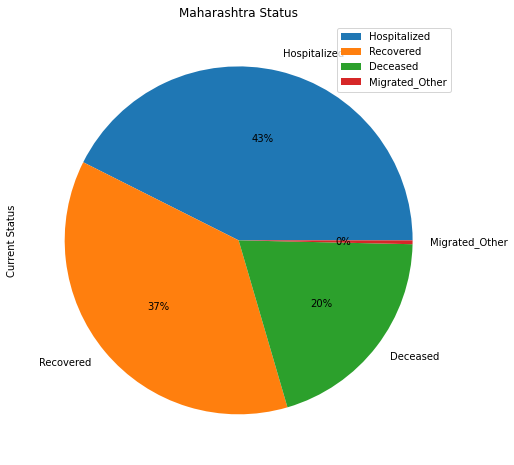

In [77]:
maharashtra_df["Current Status"].value_counts().plot.pie(autopct= "%1.f%%")
plt.title("Maharashtra Status")
plt.legend()

In [78]:
print("Total number of cases in Maharashtra", maharashtra_df["Num Cases"].sum()) #highest number of cases so far

Total number of cases in Maharashtra 80533


Text(0.5, 1.0, 'Maharashtra District-wise Breakdown')

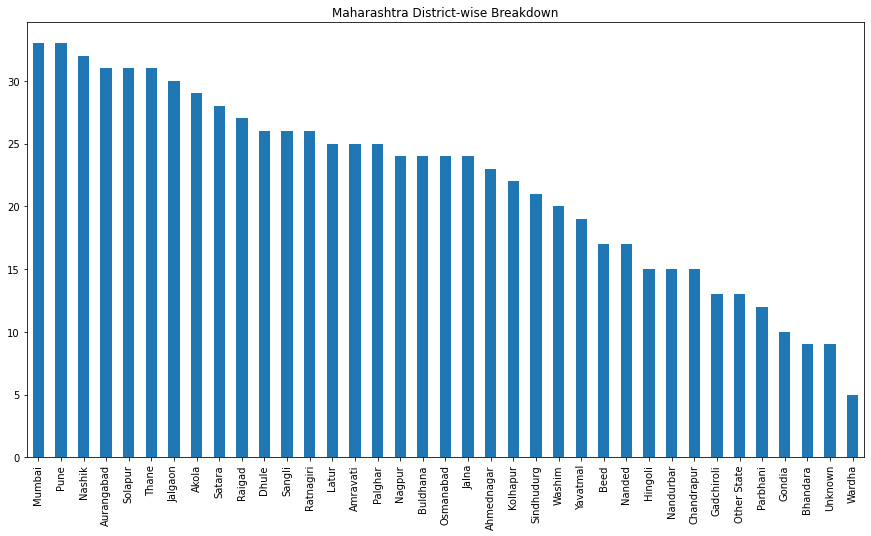

In [79]:
maharashtra_df["Detected District"].value_counts().plot.bar()
plt.title("Maharashtra District-wise Breakdown")

# TAmil Nadu Breakdown

In [80]:
tamil_df= df[df["Detected State"]== "Tamil Nadu"]

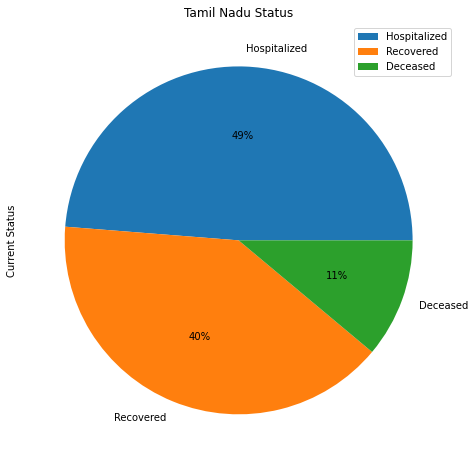

In [81]:
tamil_df["Current Status"].value_counts().plot.pie(autopct= "%1.f%%")
plt.title("Tamil Nadu Status")
plt.legend()

In [82]:
print("Total number of cases in Tamil Nadu", tamil_df["Num Cases"].sum()) #2nd highest so far

Total number of cases in Tamil Nadu 56056


Text(0.5, 1.0, 'Tamil Nadu District-wise Breakdown')

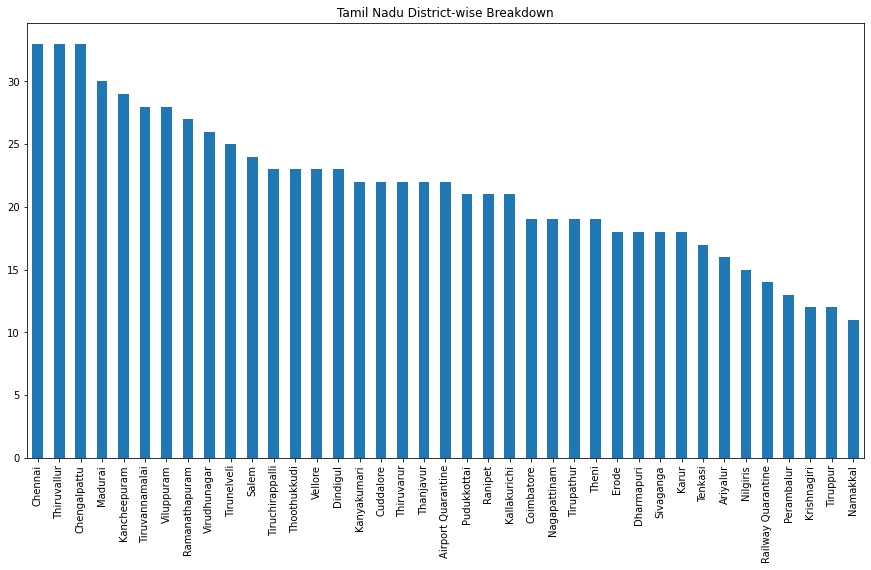

In [83]:
tamil_df["Detected District"].value_counts().plot.bar()
plt.title("Tamil Nadu District-wise Breakdown")

In [84]:
tamil_chennai= tamil_df[tamil_df["Detected District"]== "Chennai"]

In [85]:
tamil_chennai["Num Cases"].sum()

34089

In [86]:
tamil_df.head()

,Entry_ID,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Num Cases,Current Status,Notes,Source_1
238,72291,NaN,2020-06-20,NaN,NaN,NaN,Ariyalur,Tamil Nadu,TN,7,Hospitalized,NaN,https://stopcorona.tn.gov.in/wp-content/upload...
239,72292,NaN,2020-06-20,NaN,NaN,NaN,Chengalpattu,Tamil Nadu,TN,188,Hospitalized,NaN,https://stopcorona.tn.gov.in/wp-content/upload...
240,72293,NaN,2020-06-20,NaN,NaN,NaN,Chennai,Tamil Nadu,TN,1314,Hospitalized,NaN,https://stopcorona.tn.gov.in/wp-content/upload...
241,72294,NaN,2020-06-20,NaN,NaN,NaN,Coimbatore,Tamil Nadu,TN,11,Hospitalized,NaN,https://stopcorona.tn.gov.in/wp-content/upload...
242,72295,NaN,2020-06-20,NaN,NaN,NaN,Cuddalore,Tamil Nadu,TN,16,Hospitalized,NaN,https://stopcorona.tn.gov.in/wp-content/upload...


# Kerala breakdown

In [87]:
kerela_df= df[df["Detected State"]== "Kerala"]

In [88]:
kerela_df.shape

(758, 13)

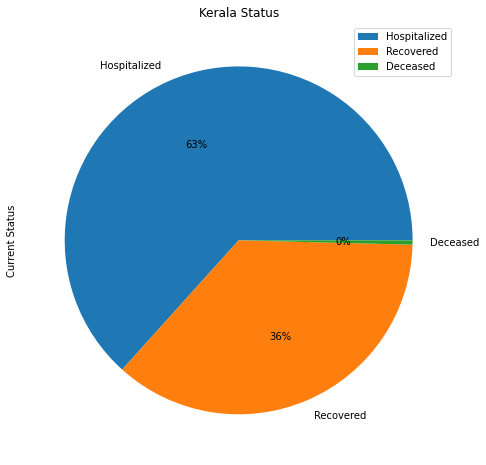

In [89]:
kerela_df["Current Status"].value_counts().plot.pie(autopct= "%1.f%%")
plt.title("Kerala Status")
plt.legend()

Text(0.5, 1.0, 'Kerala District-wise Breakdown')

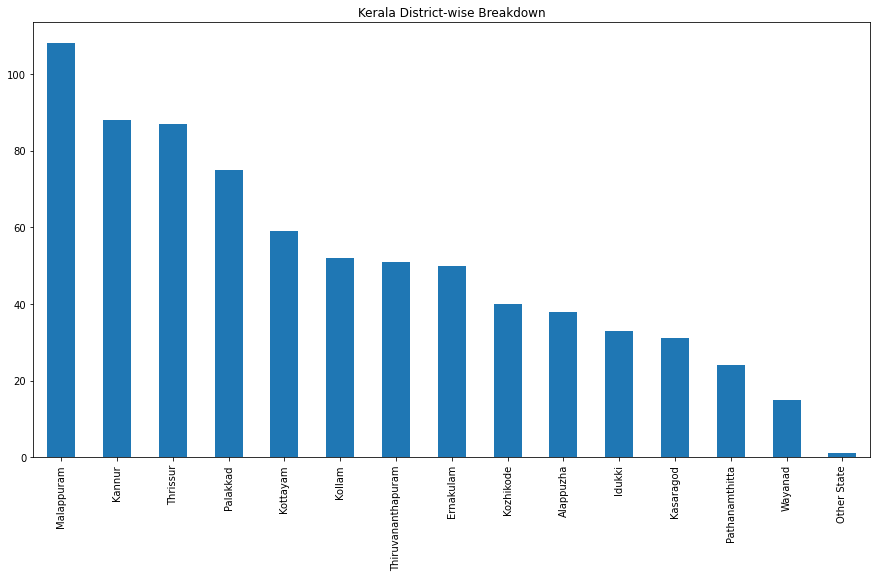

In [90]:
kerela_df["Detected District"].value_counts().plot.bar()
plt.title("Kerala District-wise Breakdown")

In [91]:
print("Total number of cases in Kerala", kerela_df["Num Cases"].sum())

Total number of cases in Kerala 2328


# Rajasthan Breakdown

In [92]:
rajashthan_df= df[df["Detected State"]== "Rajasthan"]

In [93]:
rajashthan_df.head()

,Entry_ID,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Num Cases,Current Status,Notes,Source_1
24,71999,NaN,2020-06-20,NaN,NaN,NaN,Bharatpur,Rajasthan,RJ,34,Hospitalized,NaN,https://twitter.com/airnews_jaipur/status/1274...
25,72000,NaN,2020-06-20,NaN,NaN,NaN,Bhilwara,Rajasthan,RJ,1,Hospitalized,NaN,https://twitter.com/airnews_jaipur/status/1274...
26,72001,NaN,2020-06-20,NaN,NaN,NaN,Bikaner,Rajasthan,RJ,3,Hospitalized,NaN,https://twitter.com/airnews_jaipur/status/1274...
27,72002,NaN,2020-06-20,NaN,NaN,NaN,Dholpur,Rajasthan,RJ,40,Hospitalized,NaN,https://twitter.com/airnews_jaipur/status/1274...
28,72003,NaN,2020-06-20,NaN,NaN,NaN,Jaipur,Rajasthan,RJ,36,Hospitalized,NaN,https://twitter.com/airnews_jaipur/status/1274...


In [94]:
rajashthan_df.shape

(689, 13)

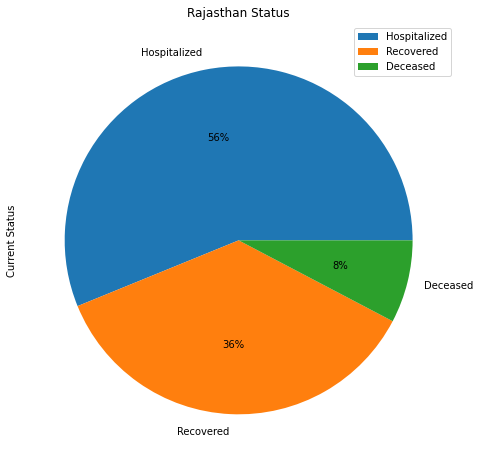

In [95]:
rajashthan_df["Current Status"].value_counts().plot.pie(autopct= "%1.f%%")
plt.title("Rajasthan Status")
plt.legend()

Text(0.5, 1.0, 'Rajasthan District-wise Breakdown')

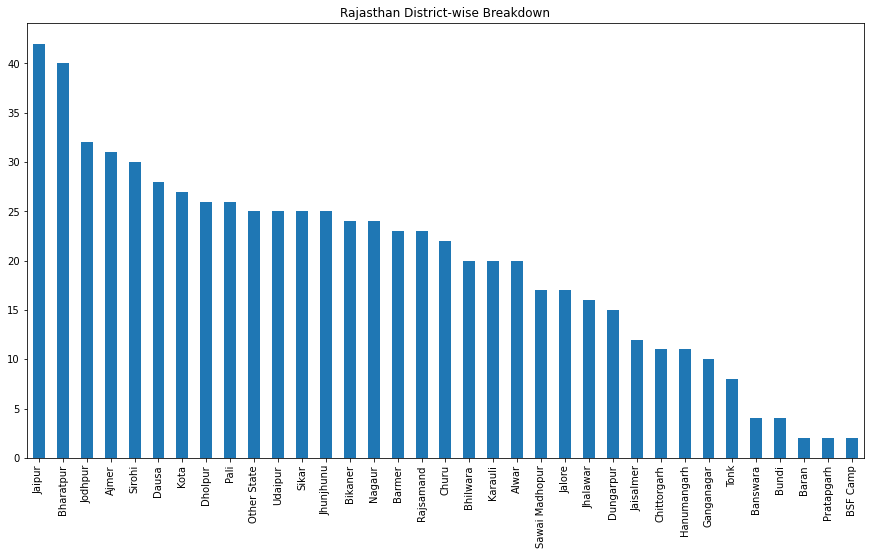

In [96]:
rajashthan_df["Detected District"].value_counts().plot.bar()
plt.title("Rajasthan District-wise Breakdown")

In [97]:
print("Total number of cases in Rajasthan", rajashthan_df["Num Cases"].sum())

Total number of cases in Rajasthan 7155


# Gujarat Breakdown 

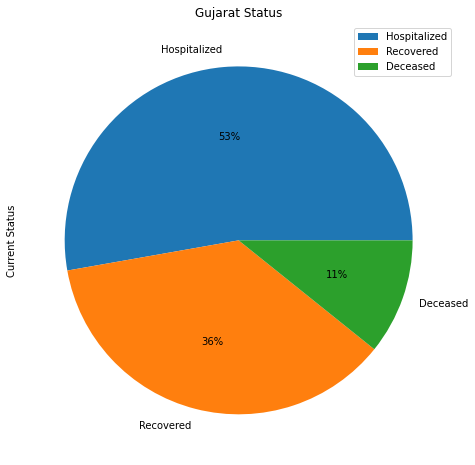

In [98]:
gujarat_df= df[df["Detected State"]== "Gujarat"]
gujarat_df["Current Status"].value_counts().plot.pie(autopct= "%1.f%%")
plt.title("Gujarat Status")
plt.legend()

In [99]:
gujarat_df.head()

,Entry_ID,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Num Cases,Current Status,Notes,Source_1
1087,73148,NaN,2020-06-20,NaN,NaN,NaN,Ahmedabad,Gujarat,GJ,306,Hospitalized,NaN,https://t.me/indiacovid/7802?single
1088,73149,NaN,2020-06-20,NaN,NaN,NaN,Surat,Gujarat,GJ,103,Hospitalized,NaN,https://t.me/indiacovid/7802?single
1089,73150,NaN,2020-06-20,NaN,NaN,NaN,Vadodara,Gujarat,GJ,43,Hospitalized,NaN,https://t.me/indiacovid/7802?single
1090,73151,NaN,2020-06-20,NaN,NaN,NaN,Bharuch,Gujarat,GJ,12,Hospitalized,NaN,https://t.me/indiacovid/7802?single
1091,73152,NaN,2020-06-20,NaN,NaN,NaN,Bhavnagar,Gujarat,GJ,9,Hospitalized,NaN,https://t.me/indiacovid/7802?single


In [100]:
gujarat_df.shape

(576, 13)

In [101]:
print("Total number of cases in Gujarat", gujarat_df["Num Cases"].sum())

Total number of cases in Gujarat 12177


Text(0.5, 1.0, 'Gujarat District-wise Breakdown')

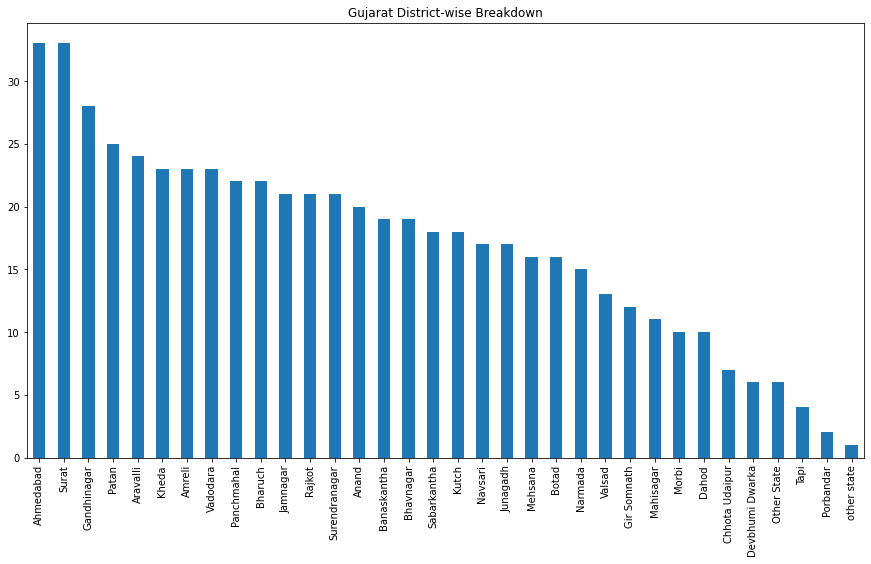

In [102]:
gujarat_df["Detected District"].value_counts().plot.bar()
plt.title("Gujarat District-wise Breakdown")

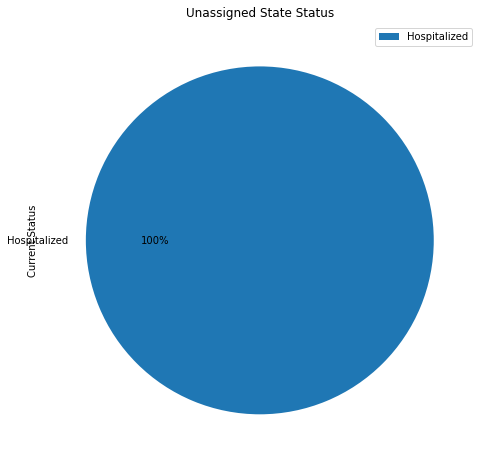

In [103]:
UN_df= df[df["Detected State"]== "State Unassigned"]
UN_df["Current Status"].value_counts().plot.pie(autopct= "%1.f%%")
plt.title("Unassigned State Status")
plt.legend()

In [104]:
df.head()

,Entry_ID,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Num Cases,Current Status,Notes,Source_1
0,71973,NaN,2020-06-20,NaN,NaN,NaN,Mamit,Mizoram,MZ,4,Hospitalized,NaN,https://twitter.com/dipr_mizoram/status/127415...
1,71974,NaN,2020-06-20,NaN,NaN,NaN,Champhai,Mizoram,MZ,3,Hospitalized,NaN,https://twitter.com/dipr_mizoram/status/127415...
2,71975,NaN,2020-06-20,NaN,NaN,NaN,Serchhip,Mizoram,MZ,2,Hospitalized,NaN,https://twitter.com/dipr_mizoram/status/127415...
3,71976,NaN,2020-06-20,NaN,NaN,NaN,Khawzawl,Mizoram,MZ,1,Hospitalized,NaN,https://twitter.com/dipr_mizoram/status/127415...
4,71977,NaN,2020-06-20,NaN,NaN,NaN,Unassigned,State Unassigned,UN,338,Hospitalized,NaN,mohfw.gov.in


In [105]:
hos= df[df["Current Status"]=="Hospitalized"]

In [106]:
hos["Num Cases"].sum()

189943

In [107]:
des= df[df["Current Status"]== "Deceased"]

In [108]:
des["Num Cases"].sum()

4441

In [109]:
rec= df[df["Current Status"]== "Recovered"]

In [110]:
rec["Num Cases"].sum()

133630

In [111]:
189943+133630+4441

328014

In [112]:
df["Num Cases"].sum()

328030

In [113]:
rec["Detected State"].value_counts()

Karnataka                      2713
Uttar Pradesh                   634
Tamil Nadu                      337
Maharashtra                     314
Kerala                          275
Rajasthan                       249
Bihar                           245
Madhya Pradesh                  234
Gujarat                         210
West Bengal                     208
Odisha                          184
Haryana                         171
Jammu and Kashmir               148
Chhattisgarh                    135
Andhra Pradesh                  128
Punjab                          101
Uttarakhand                      81
Jharkhand                        75
Himachal Pradesh                 65
Tripura                          48
Manipur                          45
Chandigarh                       37
Goa                              31
Mizoram                          21
Arunachal Pradesh                20
Puducherry                       20
Sikkim                           19
Ladakh                      

Text(0.5, 1.0, 'Reporting- Recovered State-wise')

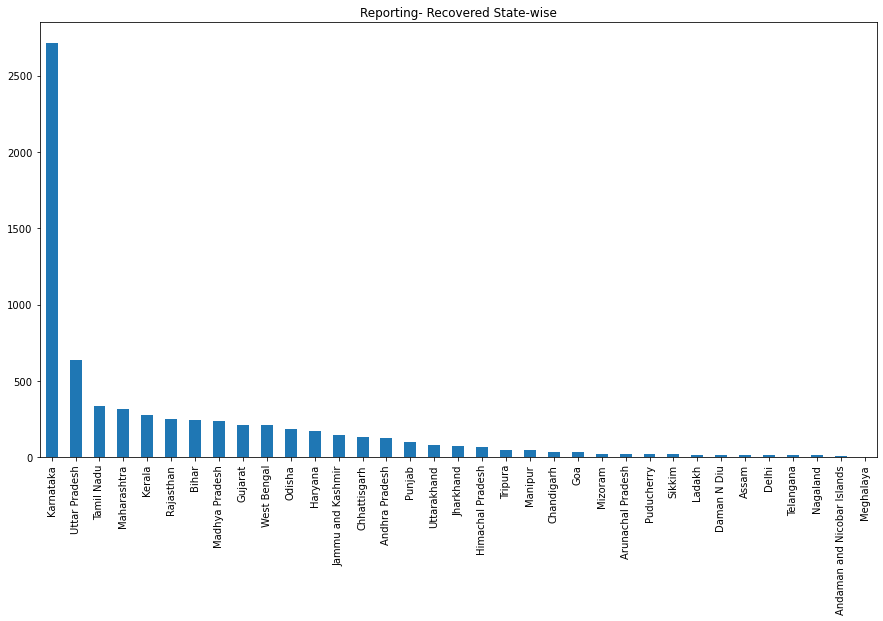

In [201]:
rec["Detected State"].value_counts().plot.bar()
plt.title("Reporting- Recovered State-wise")

Text(0.5, 1.0, 'Reporting- Hospitalised State-wise')

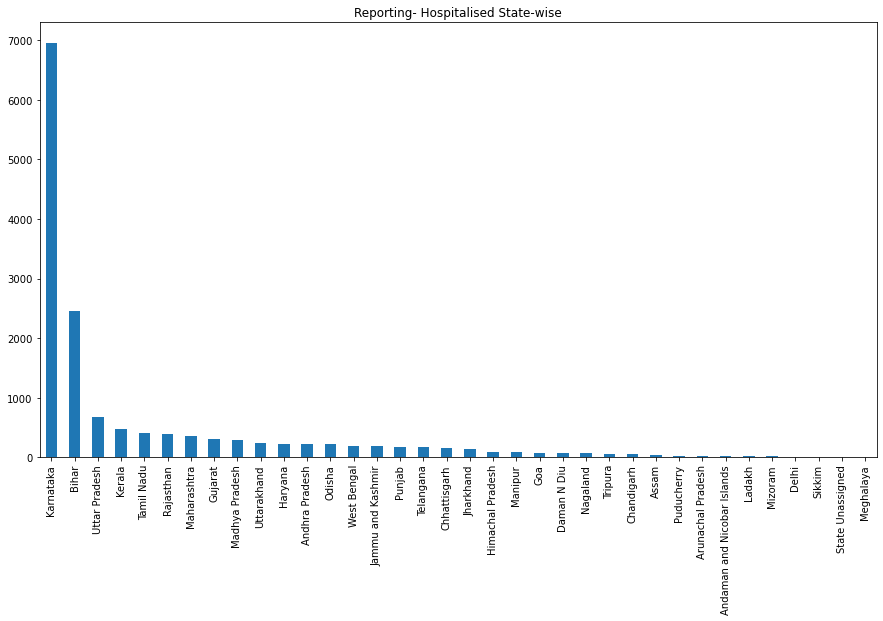

In [200]:
hos["Detected State"].value_counts().plot.bar()
plt.title("Reporting- Hospitalised State-wise")

Text(0.5, 1.0, 'Reporting- Deceased State-wise')

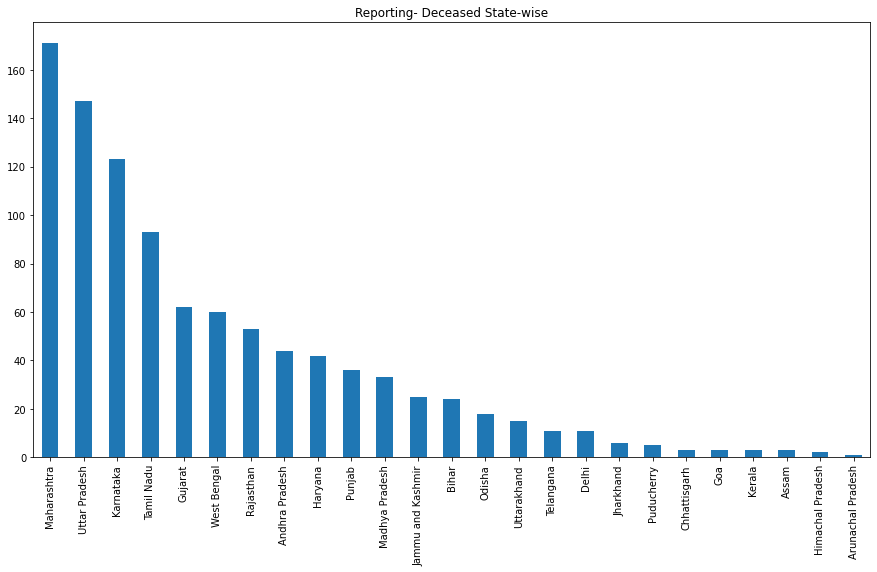

In [197]:
des["Detected State"].value_counts().plot.bar()
plt.title("Reporting- Deceased State-wise")

In [115]:
df["Detected State"].value_counts()

Karnataka                      9791
Bihar                          2721
Uttar Pradesh                  1457
Maharashtra                     850
Tamil Nadu                      839
Kerala                          758
Rajasthan                       689
Gujarat                         576
Madhya Pradesh                  560
West Bengal                     461
Haryana                         442
Odisha                          426
Andhra Pradesh                  401
Jammu and Kashmir               356
Uttarakhand                     340
Punjab                          316
Chhattisgarh                    290
Jharkhand                       214
Telangana                       191
Himachal Pradesh                156
Manipur                         131
Tripura                         109
Goa                             107
Chandigarh                       94
Daman N Diu                      81
Nagaland                         76
Assam                            60
Puducherry                  

In [116]:
MP_df= df[df["Detected State"]== "Madhya Pradesh"]
WB_df= df[df["Detected State"]== "West Bengal"]
haryana_df= df[df["Detected State"]== "Haryana"]
odisha_df= df[df["Detected State"]== "Odisha"]
AP_df= df[df["Detected State"]== "Andhra Pradesh"]
JnK_df= df[df["Detected State"]== "Jammu and Kashmir"]

In [117]:
UK_df= df[df["Detected State"]== "Uttarakhand"]
punjab_df= df[df["Detected State"]== "Punjab"]
cha_df= df[df["Detected State"]== "Chhattisgarh"]
jharkhand_df= df[df["Detected State"]== "Jharkhand"]
telangana_df= df[df["Detected State"]== "Telangana"]
HP_df= df[df["Detected State"]== "Himachal Pradesh"]
manipur_df= df[df["Detected State"]== "Manipur"]
tripura_df= df[df["Detected State"]== "Tripura"]
goa_df= df[df["Detected State"]== "Goa"]
chandigarh_df= df[df["Detected State"]== "Chandigarh"]
dd_df= df[df["Detected State"]== "Daman N Diu"]
NG_df= df[df["Detected State"]== "Nagaland"]
pudu_df= df[df["Detected State"]== "Puducherry"]
ARP_df= df[df["Detected State"]== "Arunachal Pradesh"]
mizoram_df= df[df["Detected State"]== "Mizoram"]
delhi_df= df[df["Detected State"]== "Delhi"]
ladakh_df=df[df["Detected State"]== "Ladakh"]
Sikkim_df= df[df["Detected State"]== "Sikkim"]
AND_df= df[df["Detected State"]== "Andaman and Nicobar Islands"]

In [118]:
Meghalaya_df=df[df["Detected State"]== "Meghalaya"]


In [119]:
print("Total number of cases in Karnataka", kar_Df["Num Cases"].sum())
print("Total number of cases in Bihar", bihar_df["Num Cases"].sum())
print("Total number of cases in Uttar Pradesh", UP_df["Num Cases"].sum())
print("Total number of cases in Rajasthan", rajashthan_df["Num Cases"].sum())
print("Total number of cases in Maharashtra", maharashtra_df["Num Cases"].sum())
print("Total number of cases in Tamil Nadu", tamil_df["Num Cases"].sum())
print("Total number of cases in Gujarat", gujarat_df["Num Cases"].sum())
print("Total number of cases in Kerala", kerela_df["Num Cases"].sum())
print("Total number of cases in Madhya Pradesh", MP_df["Num Cases"].sum())
print("Total number of cases in West Bengal", WB_df["Num Cases"].sum())
print("Total number of cases in Haryana", haryana_df["Num Cases"].sum())
print("Total number of cases in Odisha", odisha_df["Num Cases"].sum())
print("Total number of cases in Andra Pradesh", AP_df["Num Cases"].sum())
print("Total number of cases in Jammu and Kashmir", JnK_df["Num Cases"].sum())
print("Total number of cases in Uttarakhand", UK_df["Num Cases"].sum())
print("Total number of cases in Punjab", punjab_df["Num Cases"].sum())
print("Total number of cases in Chhattisgarh", cha_df["Num Cases"].sum())
print("Total number of cases in Jharkhand", jharkhand_df["Num Cases"].sum())
print("Total number of cases in Telangana", telangana_df["Num Cases"].sum())
print("Total number of cases in Himachal Pradesh", HP_df["Num Cases"].sum())
print("Total number of cases in Manipur", manipur_df["Num Cases"].sum())
print("Total number of cases in Tripura", tripura_df["Num Cases"].sum())
print("Total number of cases in Goa", goa_df["Num Cases"].sum())
print("Total number of cases in Chandigarh", chandigarh_df["Num Cases"].sum())
print("Total number of cases in Daman N Diu", dd_df["Num Cases"].sum())
print("Total number of cases in Nagaland", NG_df["Num Cases"].sum())
print("Total number of cases in Puducherry", pudu_df["Num Cases"].sum())
print("Total number of cases in Arunachal Pradesh", ARP_df["Num Cases"].sum())
print("Total number of cases in Mizoram", mizoram_df["Num Cases"].sum())
print("Total number of cases in Delhi", delhi_df["Num Cases"].sum())
print("Total number of cases in Ladakh", ladakh_df["Num Cases"].sum())
print("Total number of cases in Sikkim", Sikkim_df["Num Cases"].sum())
print("Total number of cases in Andaman and Nicobar",AND_df["Num Cases"].sum())
print("Total number of cases in Meghalaya", Meghalaya_df["Num Cases"].sum())

Total number of cases in Karnataka 9788
Total number of cases in Bihar 5163
Total number of cases in Uttar Pradesh 13177
Total number of cases in Rajasthan 7155
Total number of cases in Maharashtra 80533
Total number of cases in Tamil Nadu 56056
Total number of cases in Gujarat 12177
Total number of cases in Kerala 2328
Total number of cases in Madhya Pradesh 3735
Total number of cases in West Bengal 10435
Total number of cases in Haryana 9980
Total number of cases in Odisha 4298
Total number of cases in Andra Pradesh 9331
Total number of cases in Jammu and Kashmir 3371
Total number of cases in Uttarakhand 1529
Total number of cases in Punjab 3019
Total number of cases in Chhattisgarh 1788
Total number of cases in Jharkhand 1082
Total number of cases in Telangana 13817
Total number of cases in Himachal Pradesh 518
Total number of cases in Manipur 888
Total number of cases in Tripura 647
Total number of cases in Goa 1071
Total number of cases in Chandigarh 108
Total number of cases in D

Karnataka 9788
Bihar 5163
Uttar Pradesh 13177
Rajasthan 7155
Maharashtra 80533
Tamil Nadu 56056 
Gujarat 12177
Kerala 2328
Madhya Pradesh 3735
West Bengal 10435
Haryana 9980
Odisha 4298
Andra Pradesh 9331
Jammu and Kashmir 3371
Uttarakhand 1529
Punjab 3019
Chhattisgarh 1788
Jharkhand 1082
Telangana 13817
Himachal Pradesh 518
Manipur 888
Tripura 647
Goa 1071
Chandigarh 108
Daman N Diu 205
Nagaland 304
Puducherry 586
Arunachal Pradesh 105
Mizoram 134
Delhi 69730
Ladakh 782
Sikkim 47
Andaman and Nicobar 60
Meghalaya 20

In [123]:
states_df= pd.read_excel("states.xlsx")

In [124]:
states_df.head()

,State,Number of patients reported
0,Karnataka,9788
1,Bihar,5163
2,Uttar Pradesh,13177
3,Rajasthan,7155
4,Maharashtra,80533


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


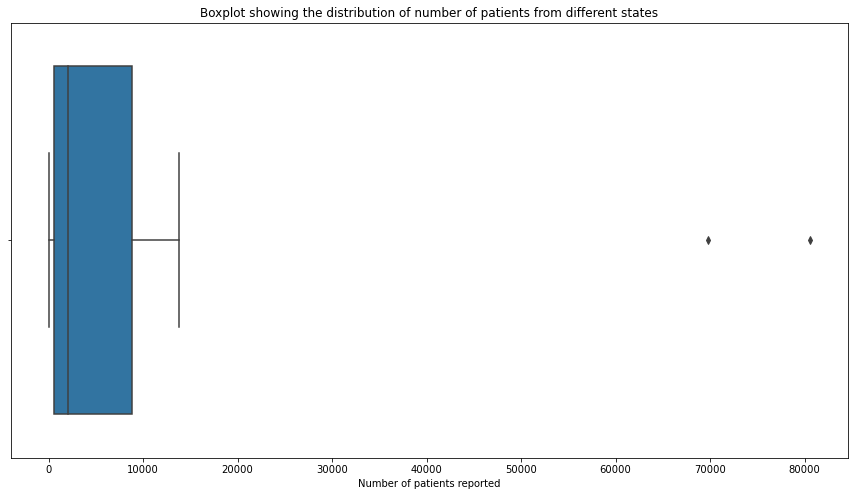

In [125]:
sns.boxplot(states_df["Number of patients reported"])
plt.title("Boxplot showing the distribution of number of patients from different states")
plt.show()

In [126]:
states_df= states_df.sort_values(by= "Number of patients reported", ascending= False)

In [127]:
states_df

,State,Number of patients reported
4,Maharashtra,80533
29,Delhi,69730
18,Telangana,13817
2,Uttar Pradesh,13177
6,Gujarat,12177
9,West Bengal,10435
10,Haryana,9980
0,Karnataka,9788
12,Andra Pradesh,9331
3,Rajasthan,7155


In [128]:
states_df.reset_index(inplace= True)

In [129]:
states_df.drop("index", axis=1, inplace= True)

In [130]:
states_df

,State,Number of patients reported
0,Maharashtra,80533
1,Delhi,69730
2,Telangana,13817
3,Uttar Pradesh,13177
4,Gujarat,12177
5,West Bengal,10435
6,Haryana,9980
7,Karnataka,9788
8,Andra Pradesh,9331
9,Rajasthan,7155


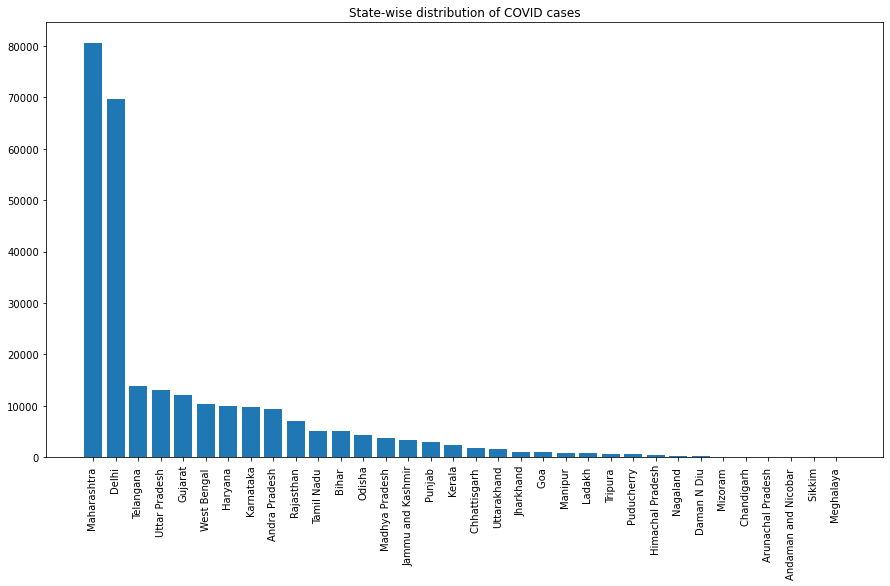

In [131]:
plt.bar(states_df["State"], states_df["Number of patients reported"])
plt.xticks(rotation= 90)
plt.title("State-wise distribution of COVID cases")
plt.show()


In [132]:
states_df

,State,Number of patients reported
0,Maharashtra,80533
1,Delhi,69730
2,Telangana,13817
3,Uttar Pradesh,13177
4,Gujarat,12177
5,West Bengal,10435
6,Haryana,9980
7,Karnataka,9788
8,Andra Pradesh,9331
9,Rajasthan,7155


# Delhi Breakdown 

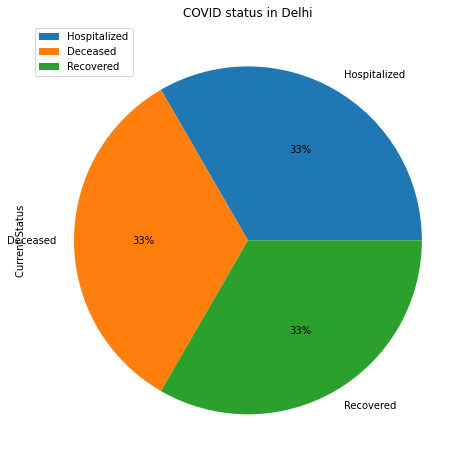

In [266]:
delhi_df["Current Status"].value_counts().plot.pie(autopct= "%1.f%%")
plt.title("COVID status in Delhi")
plt.legend()

In [137]:
delhi_df.head()

,Entry_ID,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Num Cases,Current Status,Notes,Source_1
1586,73649,NaN,2020-06-20,NaN,NaN,NaN,NaN,Delhi,DL,3630,Hospitalized,NaN,https://twitter.com/CMODelhi/status/1274398460...
1587,73650,NaN,2020-06-20,NaN,NaN,NaN,NaN,Delhi,DL,77,Deceased,NaN,https://twitter.com/CMODelhi/status/1274398460...
1588,73651,NaN,2020-06-20,NaN,NaN,NaN,NaN,Delhi,DL,7725,Recovered,NaN,https://twitter.com/CMODelhi/status/1274398460...
2795,74861,NaN,2020-06-21,NaN,NaN,NaN,NaN,Delhi,DL,3000,Hospitalized,NaN,https://twitter.com/ANI/status/127470203049433...
2796,74862,NaN,2020-06-21,NaN,NaN,NaN,NaN,Delhi,DL,1719,Recovered,NaN,https://twitter.com/ANI/status/127470203049433...


In [140]:
delhi_df["Gender"].value_counts()

Series([], Name: Gender, dtype: int64)

In [142]:
delhi_df.shape

(33, 13)

# Telangana Breakdown

In [143]:
telangana_df.head()

,Entry_ID,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Num Cases,Current Status,Notes,Source_1
1415,73478,NaN,2020-06-20,NaN,NaN,NaN,Hyderabad,Telangana,TG,458,Hospitalized,NaN,https://twitter.com/Eatala_Rajender/status/127...
1416,73479,NaN,2020-06-20,NaN,NaN,NaN,Ranga Reddy,Telangana,TG,50,Hospitalized,NaN,https://twitter.com/Eatala_Rajender/status/127...
1417,73480,NaN,2020-06-20,NaN,NaN,NaN,Medchal Malkajgiri,Telangana,TG,6,Hospitalized,NaN,https://twitter.com/Eatala_Rajender/status/127...
1418,73481,NaN,2020-06-20,NaN,NaN,NaN,Mahabubnagar,Telangana,TG,3,Hospitalized,NaN,https://twitter.com/Eatala_Rajender/status/127...
1419,73482,NaN,2020-06-20,NaN,NaN,NaN,Warangal Rural,Telangana,TG,2,Hospitalized,NaN,https://twitter.com/Eatala_Rajender/status/127...


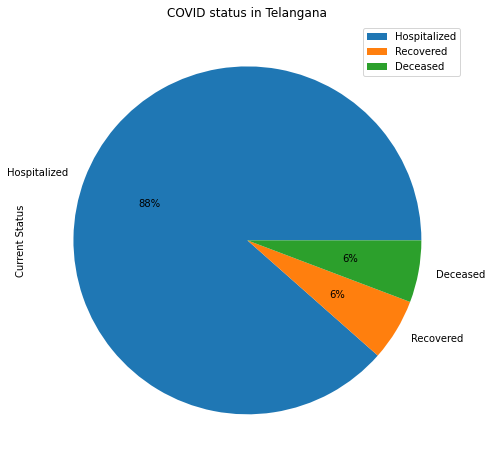

In [267]:
telangana_df["Current Status"].value_counts().plot.pie(autopct= "%1.f%%")
plt.title("COVID status in Telangana")
plt.legend()

Text(0.5, 1.0, 'Districtwise breakdown of covid cases')

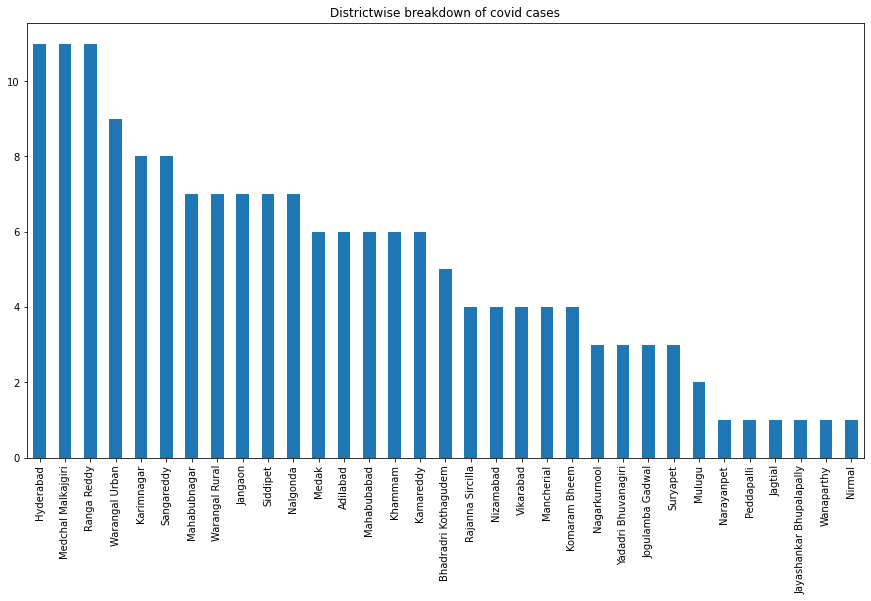

In [268]:
telangana_df["Detected District"].value_counts().plot.bar()
plt.title("Districtwise breakdown of covid cases")

# West Bengal Breakdown

In [149]:
WB_df.shape

(461, 13)

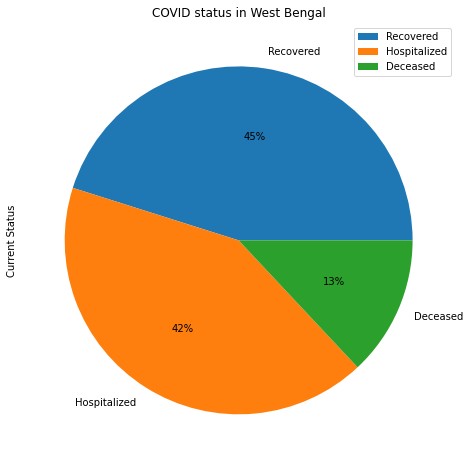

In [269]:
WB_df["Current Status"].value_counts().plot.pie(autopct= "%1.f%%")
plt.title("COVID status in West Bengal")
plt.legend()

In [153]:
WB_df.head()

,Entry_ID,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Num Cases,Current Status,Notes,Source_1
1132,73193,NaN,2020-06-20,NaN,NaN,NaN,Alipurduar,West Bengal,WB,47,Hospitalized,NaN,https://www.wbhealth.gov.in/uploaded_files/cor...
1133,73194,NaN,2020-06-20,NaN,NaN,NaN,Darjeeling,West Bengal,WB,20,Hospitalized,NaN,https://www.wbhealth.gov.in/uploaded_files/cor...
1134,73195,NaN,2020-06-20,NaN,NaN,NaN,Kalimpong,West Bengal,WB,2,Hospitalized,NaN,https://www.wbhealth.gov.in/uploaded_files/cor...
1135,73196,NaN,2020-06-20,NaN,NaN,NaN,Jalpaiguri,West Bengal,WB,13,Hospitalized,NaN,https://www.wbhealth.gov.in/uploaded_files/cor...
1136,73197,NaN,2020-06-20,NaN,NaN,NaN,Uttar Dinajpur,West Bengal,WB,3,Hospitalized,NaN,https://www.wbhealth.gov.in/uploaded_files/cor...


Text(0.5, 1.0, 'West bengal districtwise breakdown of COVID cases')

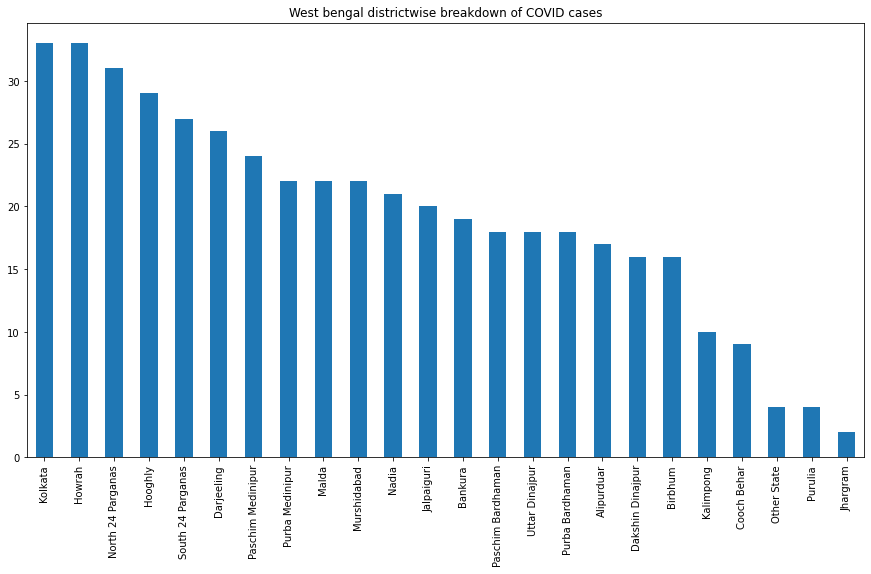

In [155]:
WB_df["Detected District"].value_counts().plot.bar()
plt.title("West bengal districtwise breakdown of COVID cases")

# haryana breakdown

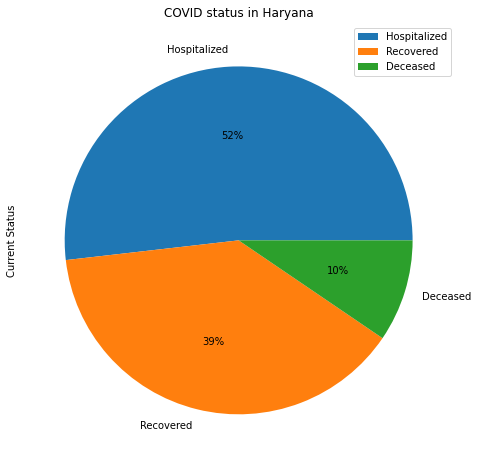

In [270]:
haryana_df["Current Status"].value_counts().plot.pie(autopct= "%1.f%%")
plt.title("COVID status in Haryana")
plt.legend()

Text(0.5, 1.0, 'Haryana districtwise breakdown of COVID cases')

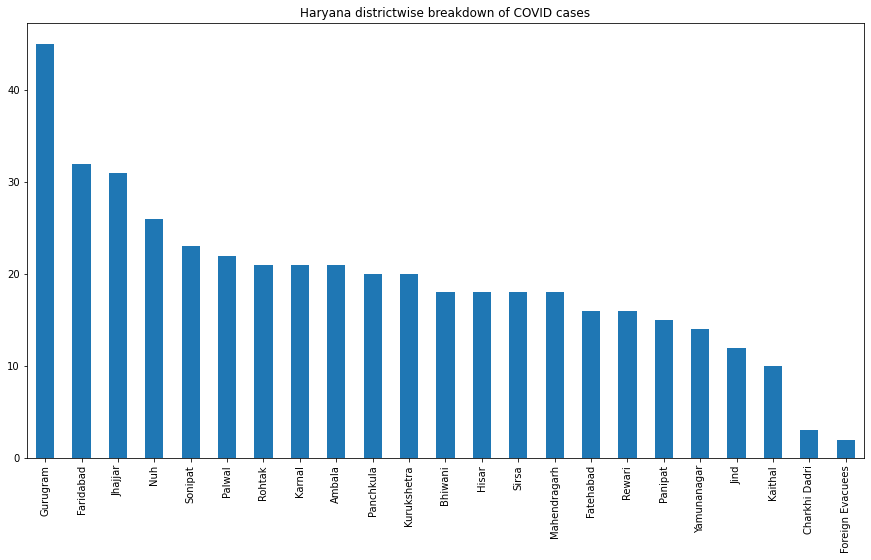

In [158]:
haryana_df["Detected District"].value_counts().plot.bar()
plt.title("Haryana districtwise breakdown of COVID cases")

In [160]:
haryana_df.head()

,Entry_ID,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Num Cases,Current Status,Notes,Source_1
174,72227,NaN,2020-06-20,NaN,NaN,NaN,Gurugram,Haryana,HR,92,Hospitalized,NaN,http://www.nhmharyana.gov.in/WriteReadData/use...
175,72228,NaN,2020-06-20,NaN,NaN,NaN,Jhajjar,Haryana,HR,5,Hospitalized,NaN,http://www.nhmharyana.gov.in/WriteReadData/use...
176,72229,NaN,2020-06-20,NaN,NaN,NaN,Nuh,Haryana,HR,2,Hospitalized,NaN,http://www.nhmharyana.gov.in/WriteReadData/use...
177,72230,NaN,2020-06-20,NaN,NaN,NaN,Yamunanagar,Haryana,HR,9,Hospitalized,NaN,http://www.nhmharyana.gov.in/WriteReadData/use...
178,72231,NaN,2020-06-20,NaN,NaN,NaN,Kaithal,Haryana,HR,1,Hospitalized,NaN,http://www.nhmharyana.gov.in/WriteReadData/use...


# Andra Pradesh breakdown

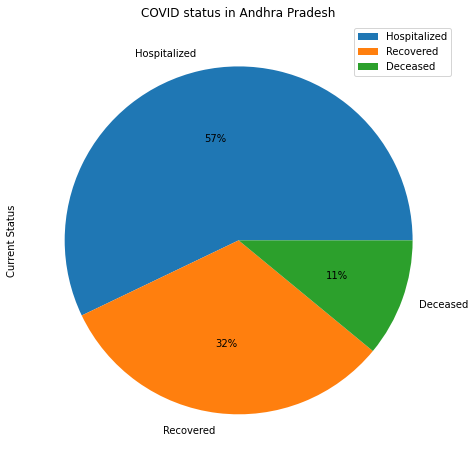

In [271]:
AP_df["Current Status"].value_counts().plot.pie(autopct= "%1.f%%")
plt.title("COVID status in Andhra Pradesh")
plt.legend()

Text(0.5, 1.0, 'Andhra Pradesh districtwise breakdown of COVID cases')

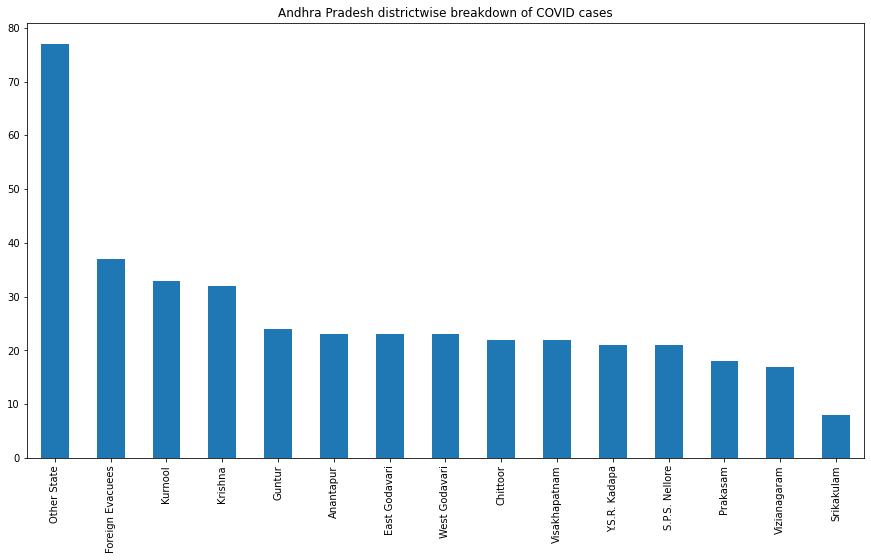

In [163]:
AP_df["Detected District"].value_counts().plot.bar()
plt.title("Andhra Pradesh districtwise breakdown of COVID cases")

In [165]:
AP_df.head()

,Entry_ID,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Num Cases,Current Status,Notes,Source_1
311,72364,NaN,2020-06-20,NaN,NaN,NaN,Anantapur,Andhra Pradesh,AP,97,Hospitalized,NaN,https://twitter.com/ArogyaAndhra/status/127431...
312,72365,NaN,2020-06-20,NaN,NaN,NaN,Chittoor,Andhra Pradesh,AP,51,Hospitalized,NaN,https://twitter.com/ArogyaAndhra/status/127431...
313,72366,NaN,2020-06-20,NaN,NaN,NaN,East Godavari,Andhra Pradesh,AP,41,Hospitalized,NaN,https://twitter.com/ArogyaAndhra/status/127431...
314,72367,NaN,2020-06-20,NaN,NaN,NaN,Guntur,Andhra Pradesh,AP,17,Hospitalized,NaN,https://twitter.com/ArogyaAndhra/status/127431...
315,72368,NaN,2020-06-20,NaN,NaN,NaN,Y.S.R. Kadapa,Andhra Pradesh,AP,15,Hospitalized,NaN,https://twitter.com/ArogyaAndhra/status/127431...


In [167]:
AP_df.shape

(401, 13)

In [168]:
states_df

,State,Number of patients reported
0,Maharashtra,80533
1,Delhi,69730
2,Telangana,13817
3,Uttar Pradesh,13177
4,Gujarat,12177
5,West Bengal,10435
6,Haryana,9980
7,Karnataka,9788
8,Andra Pradesh,9331
9,Rajasthan,7155


# Odisha Breakdown

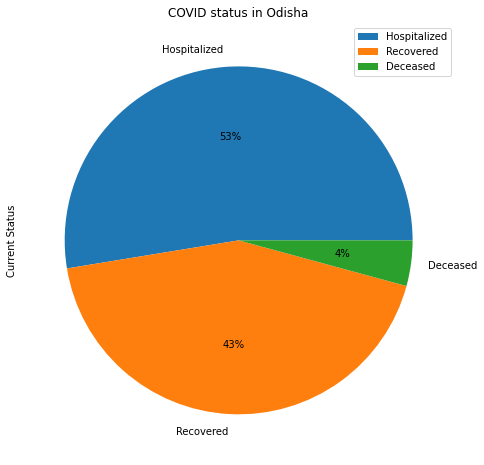

In [272]:
odisha_df["Current Status"].value_counts().plot.pie(autopct= "%1.f%%")
plt.title("COVID status in Odisha")
plt.legend()

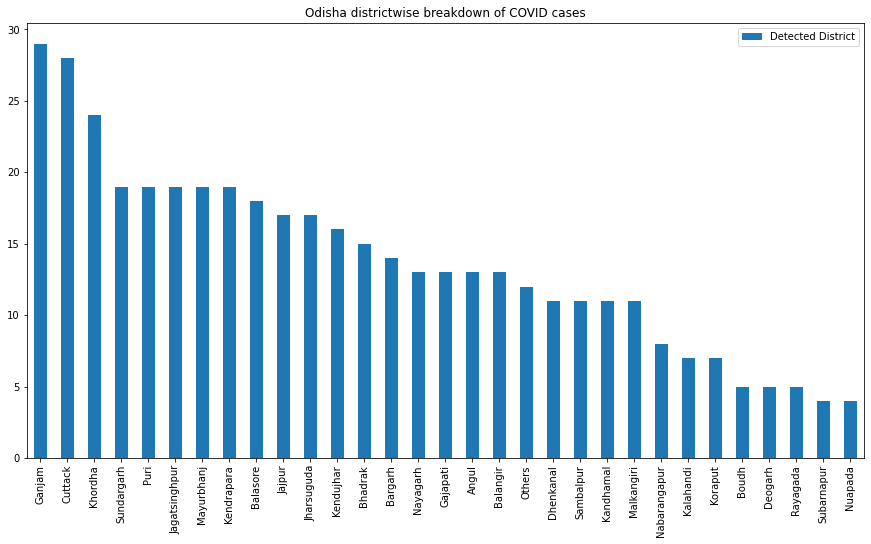

In [273]:
odisha_df["Detected District"].value_counts().plot.bar()
plt.title("Odisha districtwise breakdown of COVID cases")
plt.legend()

In [171]:
odisha_df.head()

,Entry_ID,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Num Cases,Current Status,Notes,Source_1
7,71980,NaN,2020-06-20,NaN,NaN,NaN,Khordha,Odisha,OR,27,Hospitalized,NaN,https://twitter.com/IPR_Odisha/status/12742062...
8,71981,NaN,2020-06-20,NaN,NaN,NaN,Angul,Odisha,OR,6,Hospitalized,NaN,https://twitter.com/IPR_Odisha/status/12742062...
9,71982,NaN,2020-06-20,NaN,NaN,NaN,Nabarangapur,Odisha,OR,1,Hospitalized,NaN,https://twitter.com/IPR_Odisha/status/12742062...
10,71983,NaN,2020-06-20,NaN,NaN,NaN,Jagatsinghpur,Odisha,OR,4,Hospitalized,NaN,https://twitter.com/IPR_Odisha/status/12742062...
11,71984,NaN,2020-06-20,NaN,NaN,NaN,Cuttack,Odisha,OR,15,Hospitalized,NaN,https://twitter.com/IPR_Odisha/status/12742062...


57.333333333333336


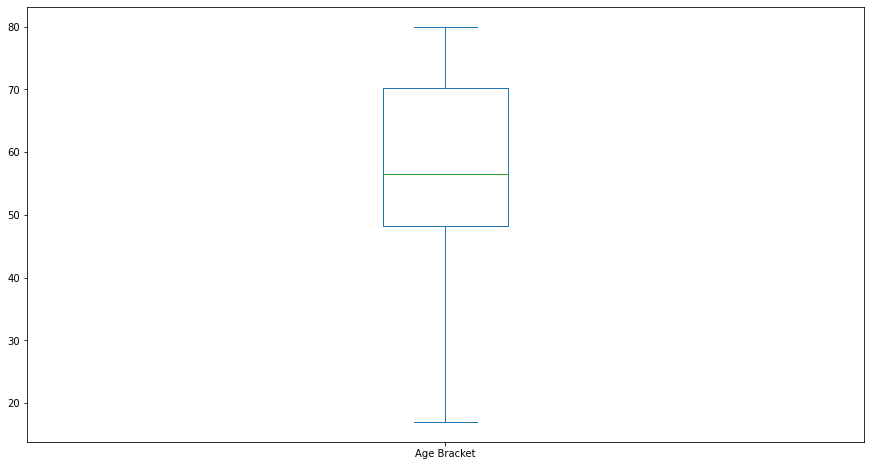

In [191]:
odisha_df["Age Bracket"].plot.box()
print(odisha_df["Age Bracket"].mean())

# Madhya Pradesh Breakdown


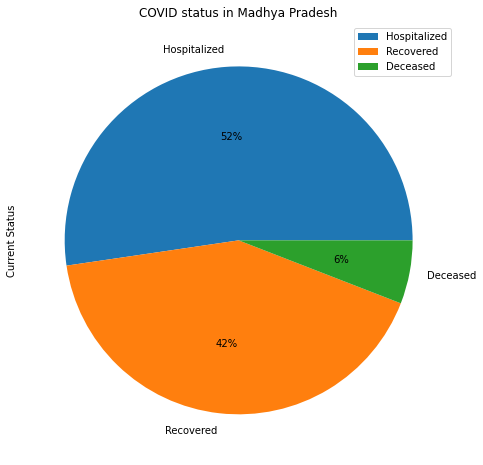

In [274]:
MP_df["Current Status"].value_counts().plot.pie(autopct= "%1.f%%")
plt.title("COVID status in Madhya Pradesh")
plt.legend()

Text(0.5, 1.0, 'Madhya Pradesh districtwise breakdown of COVID cases')

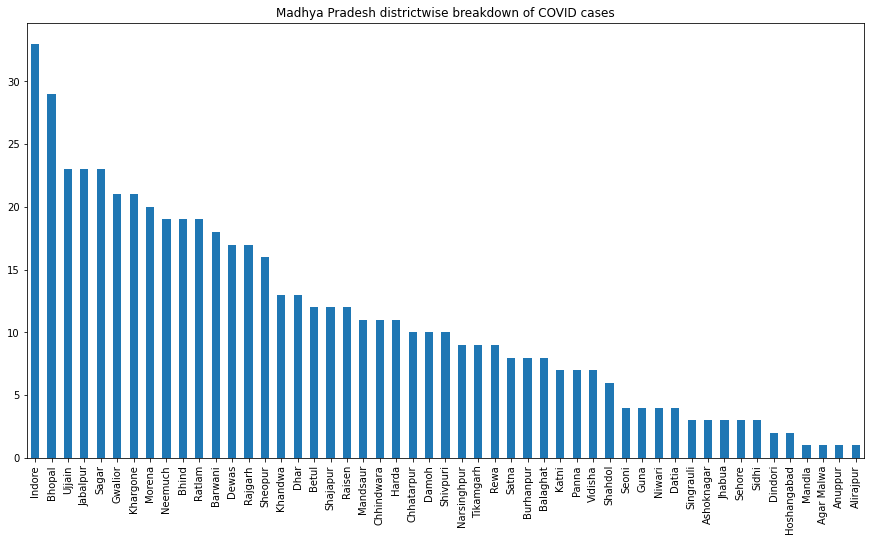

In [180]:
MP_df["Detected District"].value_counts().plot.bar()
plt.title("Madhya Pradesh districtwise breakdown of COVID cases")

# JnK

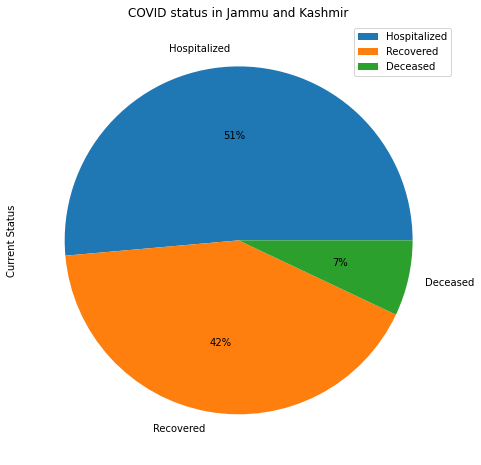

In [275]:
JnK_df["Current Status"].value_counts().plot.pie(autopct= "%1.f%%")
plt.title("COVID status in Jammu and Kashmir")
plt.legend()

Text(0.5, 1.0, 'Jammu and Kashmir districtwise breakdown of COVID cases')

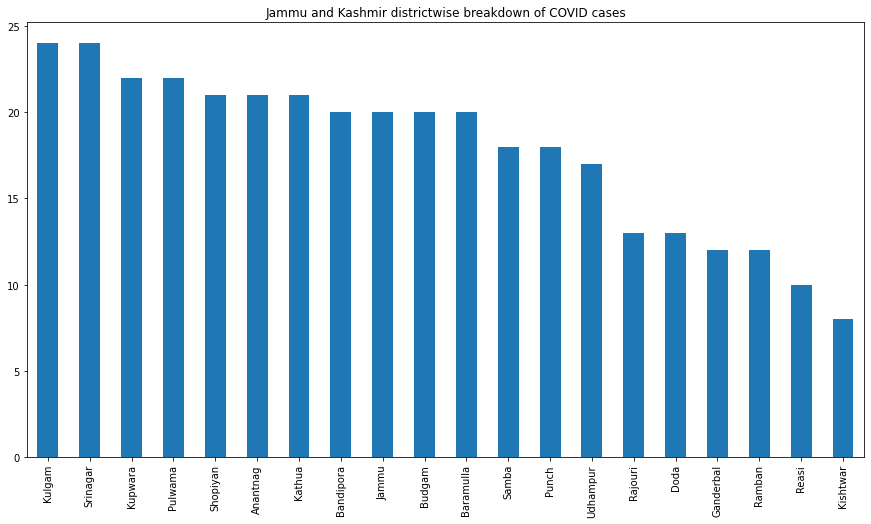

In [185]:
JnK_df["Detected District"].value_counts().plot.bar()
plt.title("Jammu and Kashmir districtwise breakdown of COVID cases")

# Punjab

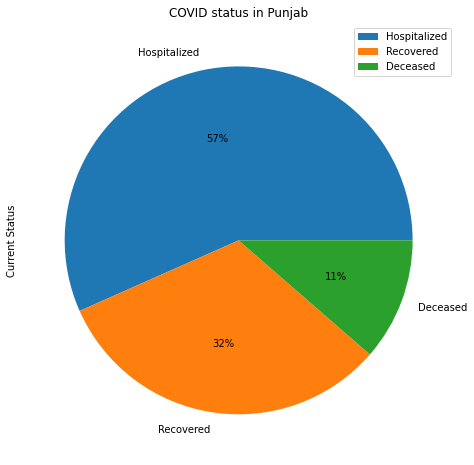

In [276]:
punjab_df["Current Status"].value_counts().plot.pie(autopct= "%1.f%%")
plt.title("COVID status in Punjab")
plt.legend()

Text(0.5, 1.0, 'Punjab districtwise breakdown of COVID cases')

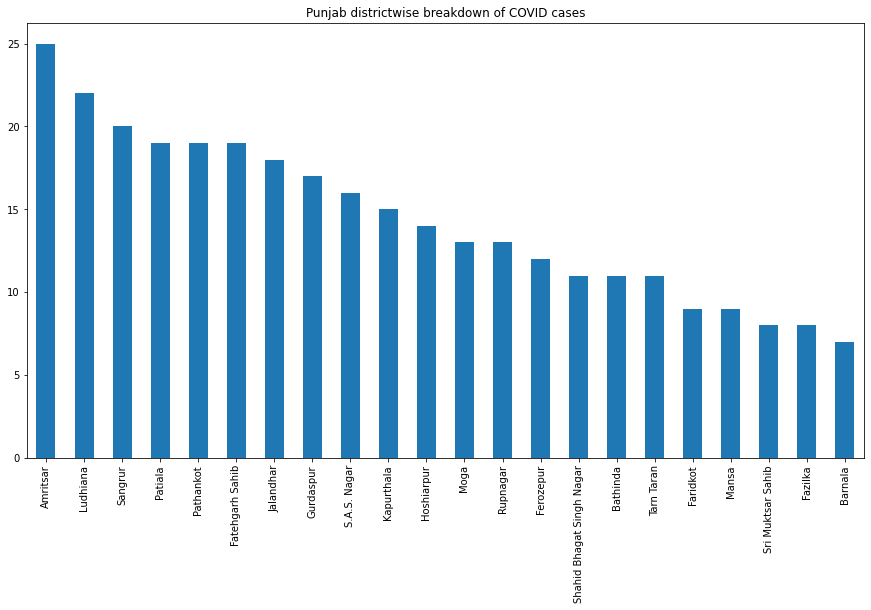

In [189]:
punjab_df["Detected District"].value_counts().plot.bar()
plt.title("Punjab districtwise breakdown of COVID cases")

# Chhattisgarh

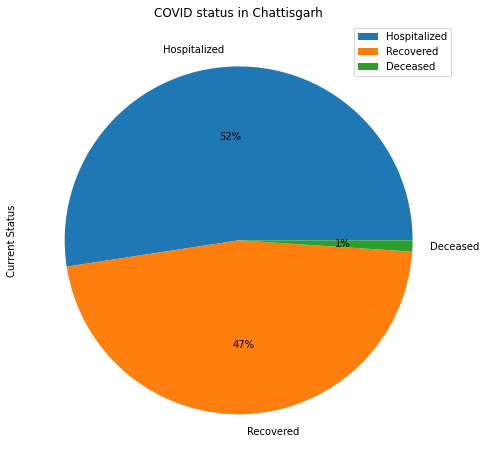

In [277]:
cha_df["Current Status"].value_counts().plot.pie(autopct= "%1.f%%")
plt.title("COVID status in Chattisgarh")
plt.legend()

Text(0.5, 1.0, 'Chattisgarh districtwise breakdown of COVID cases reports')

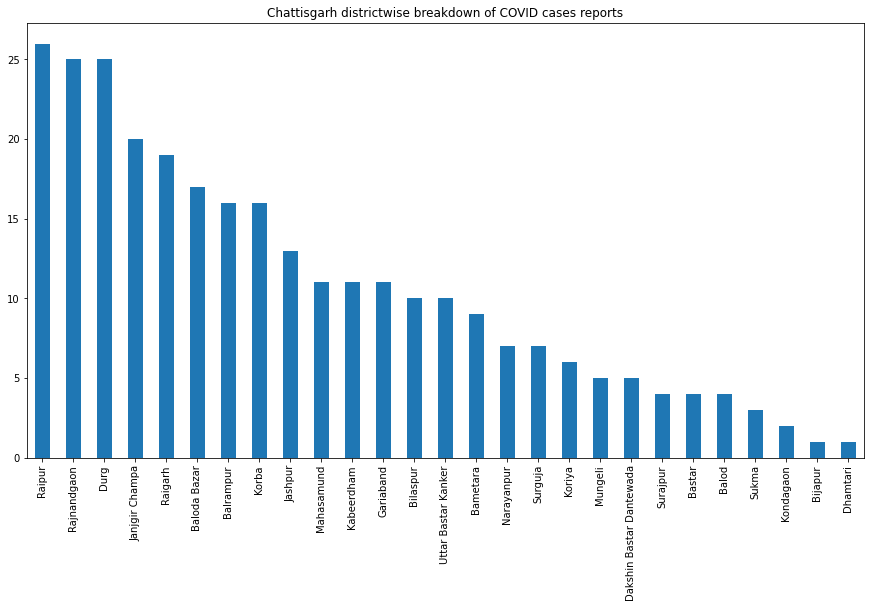

In [205]:
cha_df["Detected District"].value_counts().plot.bar()
plt.title("Chattisgarh districtwise breakdown of COVID cases reports")

# Uttarakhand

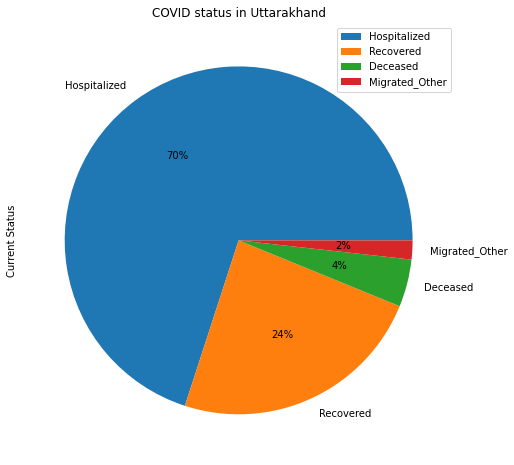

In [278]:
UK_df["Current Status"].value_counts().plot.pie(autopct= "%1.f%%")
plt.title("COVID status in Uttarakhand")
plt.legend()

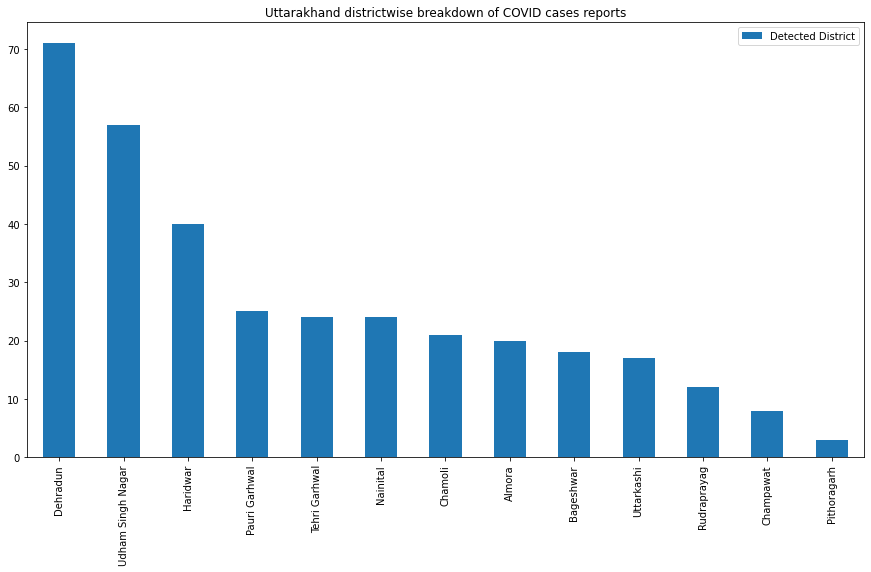

In [279]:
UK_df["Detected District"].value_counts().plot.bar()
plt.title("Uttarakhand districtwise breakdown of COVID cases reports")
plt.legend()

In [210]:
UK_df.head()

,Entry_ID,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Num Cases,Current Status,Notes,Source_1
135,72185,NaN,2020-06-20,NaN,NaN,NaN,Almora,Uttarakhand,UT,6,Hospitalized,Returnees from Delhi/NCR,https://twitter.com/PIBDehradun/status/1274276...
136,72186,NaN,2020-06-20,NaN,NaN,NaN,Chamoli,Uttarakhand,UT,6,Hospitalized,Returnees from Delhi,https://twitter.com/PIBDehradun/status/1274276...
137,72187,NaN,2020-06-20,NaN,NaN,NaN,Chamoli,Uttarakhand,UT,1,Hospitalized,Returnee from Gurugram,https://twitter.com/PIBDehradun/status/1274276...
138,72188,NaN,2020-06-20,NaN,NaN,NaN,Dehradun,Uttarakhand,UT,17,Hospitalized,Health Care Worker,https://twitter.com/PIBDehradun/status/1274276...
139,72189,NaN,2020-06-20,NaN,NaN,NaN,Dehradun,Uttarakhand,UT,16,Hospitalized,Travel history curretly NA,https://twitter.com/PIBDehradun/status/1274276...


# Jharkhand

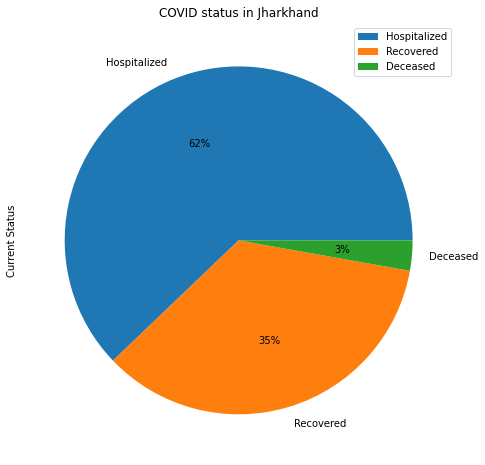

In [280]:
jharkhand_df["Current Status"].value_counts().plot.pie(autopct= "%1.f%%")
plt.title("COVID status in Jharkhand")
plt.legend()

Text(0.5, 1.0, 'Jharkhand districtwise breakdown of COVID cases reports')

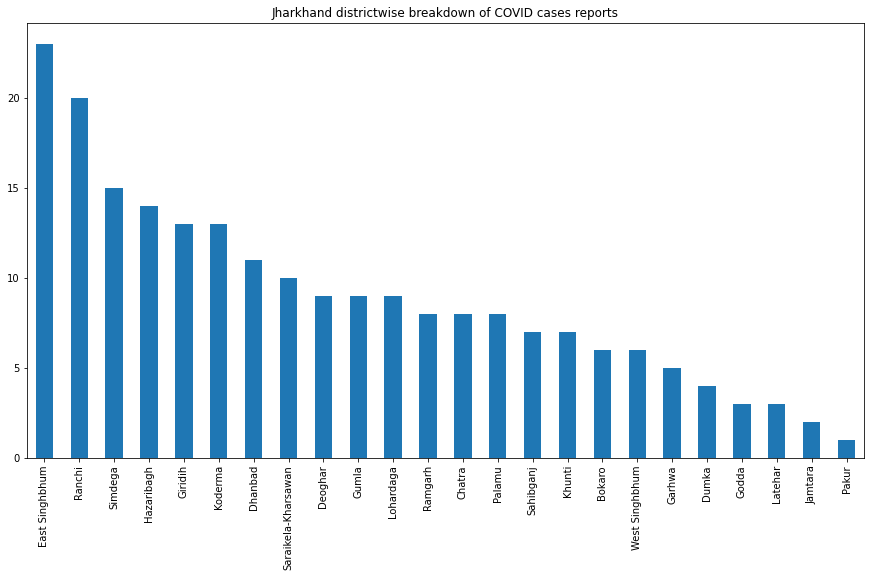

In [212]:
jharkhand_df["Detected District"].value_counts().plot.bar()
plt.title("Jharkhand districtwise breakdown of COVID cases reports")

#  Goa

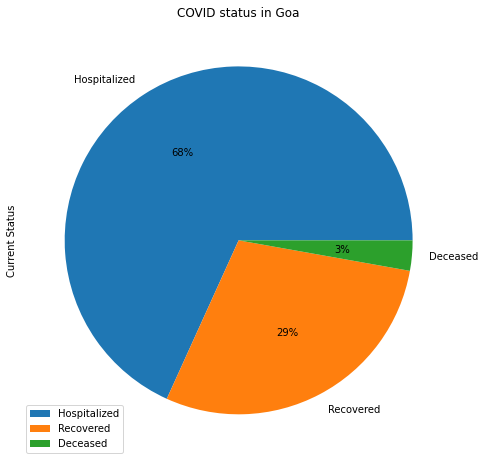

In [281]:
goa_df["Current Status"].value_counts().plot.pie(autopct= "%1.f%%")
plt.title("COVID status in Goa")
plt.legend()

<AxesSubplot:>

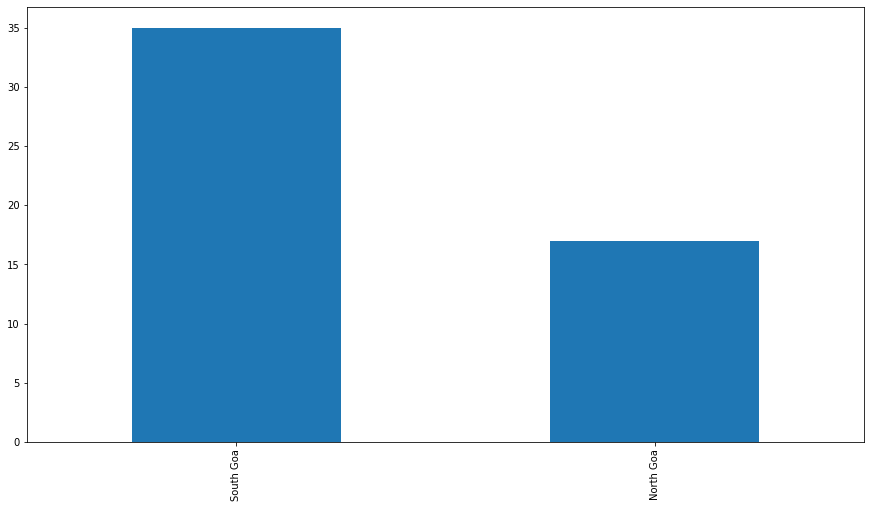

In [226]:
goa_df["Detected District"].value_counts().plot.bar()

# Manipur


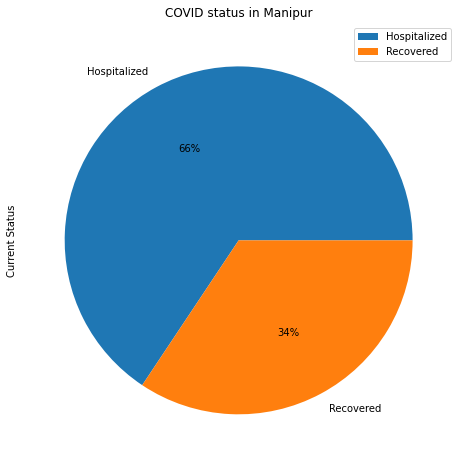

In [282]:
manipur_df["Current Status"].value_counts().plot.pie(autopct= "%1.f%%")
plt.title("COVID status in Manipur")
plt.legend()

Text(0.5, 1.0, 'Manipur districtwise breakdown of COVID cases reports')

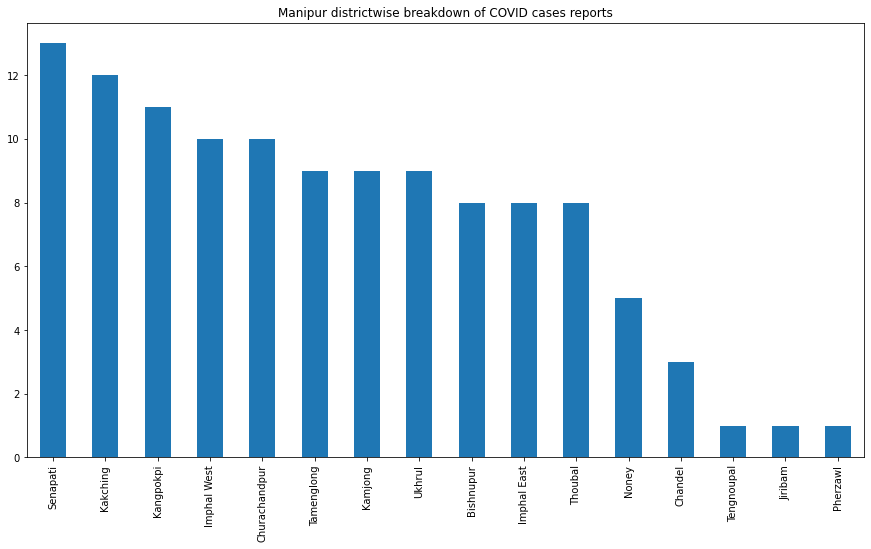

In [230]:
manipur_df["Detected District"].value_counts().plot.bar()
plt.title("Manipur districtwise breakdown of COVID cases reports")

# Ladakh

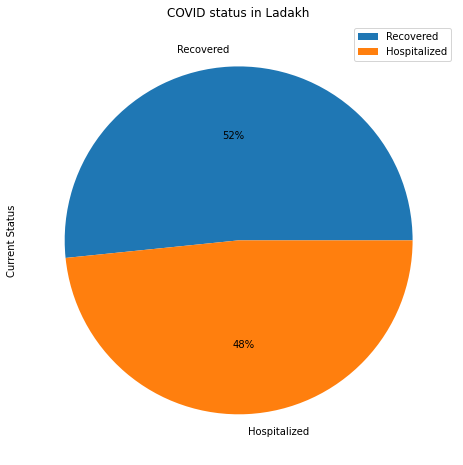

In [283]:
ladakh_df["Current Status"].value_counts().plot.pie(autopct= "%1.f%%")
plt.title("COVID status in Ladakh")
plt.legend()

Text(0.5, 1.0, 'Ladakh districtwise breakdown of COVID cases reports')

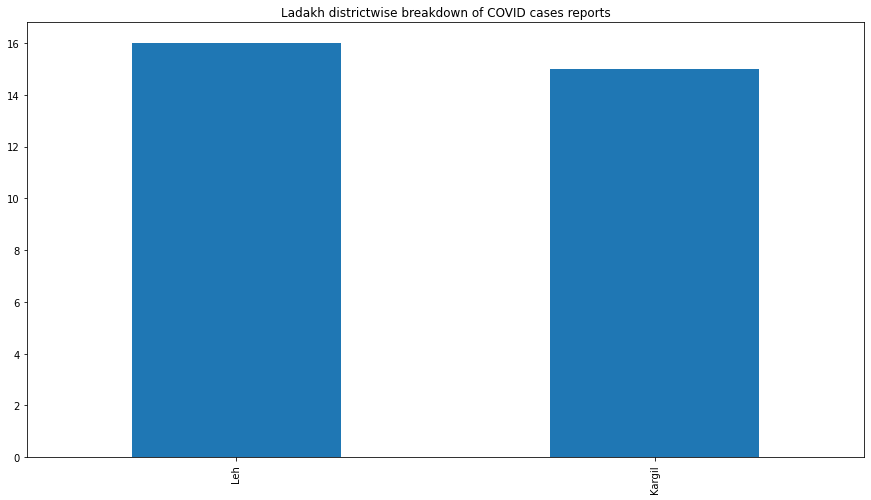

In [235]:
ladakh_df["Detected District"].value_counts().plot.bar()
plt.title("Ladakh districtwise breakdown of COVID cases reports")

# Tripura

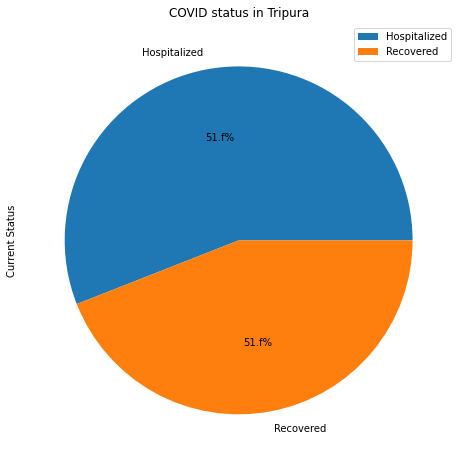

In [284]:
tripura_df["Current Status"].value_counts().plot.pie(autopct= "51.f%%")
plt.title("COVID status in Tripura")
plt.legend()

Text(0.5, 1.0, 'Tripura districtwise breakdown of COVID cases reports')

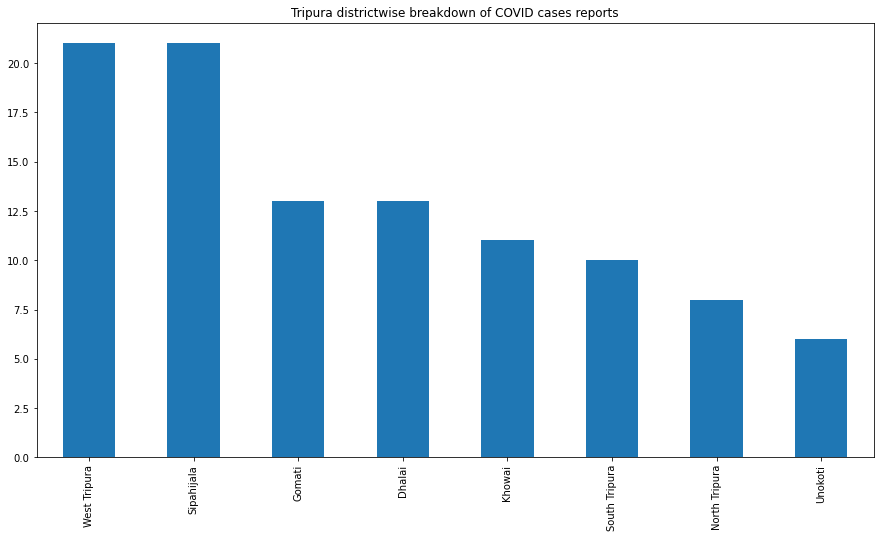

In [238]:
tripura_df["Detected District"].value_counts().plot.bar()
plt.title("Tripura districtwise breakdown of COVID cases reports")

In [239]:
tripura_df["Age Bracket"].value_counts()

Series([], Name: Age Bracket, dtype: int64)

In [242]:
tripura_df["Gender"].value_counts()

Series([], Name: Gender, dtype: int64)

In [243]:
states_df

,State,Number of patients reported
0,Maharashtra,80533
1,Delhi,69730
2,Telangana,13817
3,Uttar Pradesh,13177
4,Gujarat,12177
5,West Bengal,10435
6,Haryana,9980
7,Karnataka,9788
8,Andra Pradesh,9331
9,Rajasthan,7155


# puducherry 

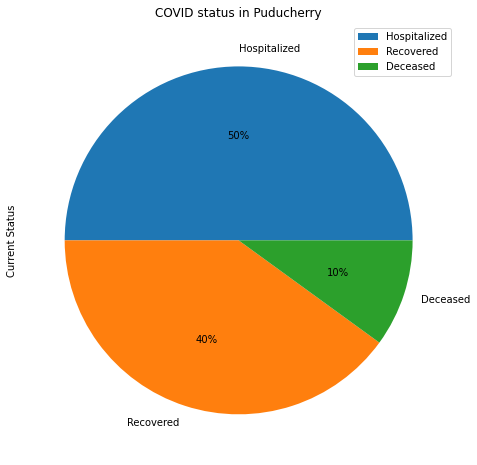

In [285]:
pudu_df["Current Status"].value_counts().plot.pie(autopct= "%1.f%%")
plt.title("COVID status in Puducherry")
plt.legend()

Text(0.5, 1.0, 'Puducherry districtwise breakdown of COVID cases reports')

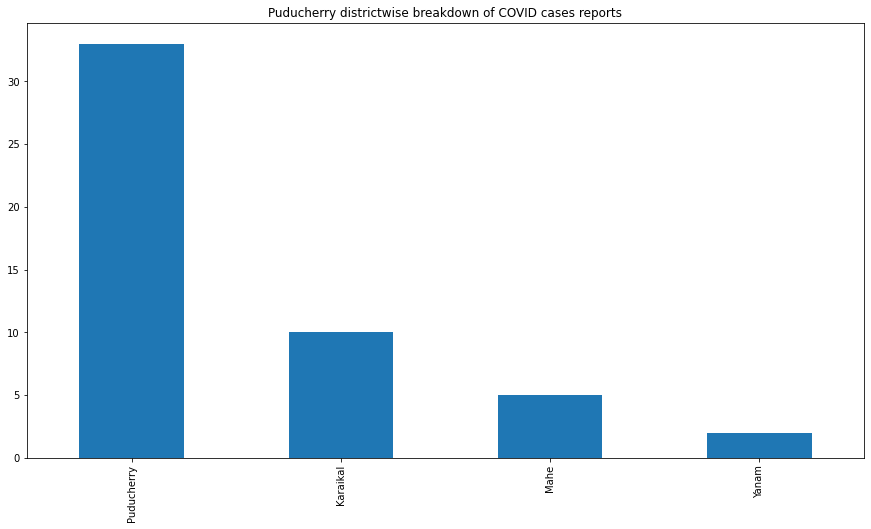

In [251]:
pudu_df["Detected District"].value_counts().plot.bar()
plt.title("Puducherry districtwise breakdown of COVID cases reports")

In [253]:
pudu_df["Age Bracket"].value_counts()

Series([], Name: Age Bracket, dtype: int64)

   #  Himachal Pradesh

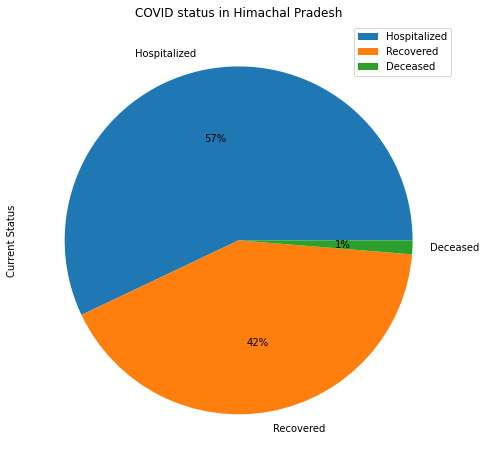

In [286]:
HP_df["Current Status"].value_counts().plot.pie(autopct= "%1.f%%")
plt.title("COVID status in Himachal Pradesh")
plt.legend()

Text(0.5, 1.0, 'Himachal Pradesh districtwise breakdown of COVID cases reports')

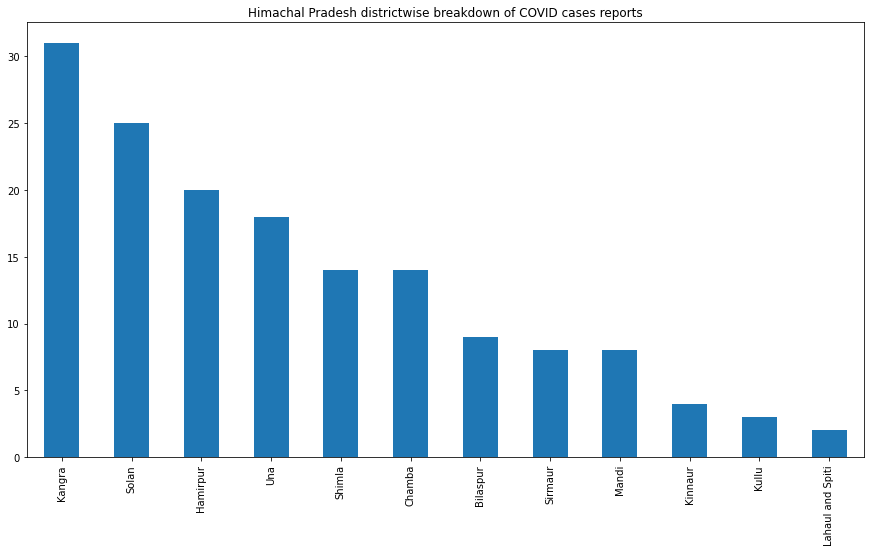

In [257]:
HP_df["Detected District"].value_counts().plot.bar()
plt.title("Himachal Pradesh districtwise breakdown of COVID cases reports")

In [259]:
HP_df["Gender"].value_counts()

Series([], Name: Gender, dtype: int64)